In [2]:
import pandas as pd

# Load your file
df = pd.read_excel(r"C:\Users\jelli\OneDrive\Desktop\DSBA 6400\Crown Legacy Stats_FULL.xlsx", sheet_name="Sheet1")

# Clean the dataset by removing the first two non-data rows
df = df.iloc[2:].copy()
df.reset_index(drop=True, inplace=True)
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\jelli\\OneDrive\\Desktop\\DSBA 6400\\Crown Legacy Stats_FULL.xlsx'

In [3]:
# Initial Inspection

df.shape              # Rows and columns
df.info()             # Data types and missing values
df.describe()         # Summary stats for all numeric columns
df.head()             # Peek at first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Columns: 109 entries, Date to PPDA
dtypes: float64(104), object(5)
memory usage: 138.1+ KB


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,Throw ins,Accurate throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.0,2.77,17.0,4.0,...,19.0,17.0,89.47,4.0,15.00,4.40,8.28,19.22,21.08,8.58
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.0,1.37,11.0,9.0,...,13.0,13.0,100.00,5.0,15.40,2.91,19.34,19.15,22.95,17.67
2,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.0,3.62,23.0,5.0,...,26.0,25.0,96.15,2.0,15.72,3.38,9.12,14.93,19.57,8.14
3,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Orlando City B,4-4-2 (100.0%),1.0,0.57,10.0,3.0,...,25.0,22.0,88.00,12.0,15.85,3.95,8.09,20.28,19.37,8.72
4,2025-08-23,Crown Legacy FC - Inter Miami II 6:0,United States. MLS Next Pro,93.0,Crown Legacy FC,4-4-2 (100.0%),6.0,4.85,21.0,13.0,...,28.0,24.0,85.71,5.0,15.62,4.05,8.24,15.65,18.99,11.21


In [4]:
# Check for missing values:

df.isnull().sum().sort_values(ascending=False)


Accurate forward passes          13
% Accurate forward passes        13
Forward passes                   12
Match                             0
Date                              0
                                 ..
Average passes per possession     0
Long pass %                       0
Average shot distance             0
Average pass length               0
PPDA                              0
Length: 109, dtype: int64

In [5]:
# Clean & Prepare

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [6]:
# Ensure numeric columns are actually numeric:

numeric_cols = df.columns.drop(['Date', 'Match', 'Competition', 'Team', 'Scheme'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [7]:
# Targeted Summary Stats Key Metrics

df[['Goals', 'xG', 'Shots', 'Shots on Target', 'Possession, %']].describe()


,Goals,xG,Shots,Shots on Target,"Possession, %"
count,162.000000,162.000000,162.000000,162.000000,162.000000
mean,1.716049,1.657654,12.530864,4.925926,50.000000
std,1.389710,0.915492,4.937086,2.692422,7.452329
min,0.000000,0.030000,2.000000,0.000000,25.200000
25%,1.000000,0.942500,9.000000,3.000000,45.627500
50%,1.000000,1.545000,12.000000,5.000000,50.000000
75%,2.750000,2.165000,15.000000,7.000000,54.372500
max,6.000000,5.280000,27.000000,13.000000,74.800000


In [8]:
# Targeted Summary Stats Duels and Passing

df[['Duels', 'Duels Won', 'Duels Won%', 'Passes', 'Accurate Passes', '% Accurate Passes']].describe()


,Duels,Duels Won,Duels Won%,Passes,Accurate Passes,% Accurate Passes
count,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000
mean,195.938272,95.024691,48.49963,426.518519,359.395062,83.674074
std,27.530377,15.955275,4.47456,85.888431,84.813230,4.472673
min,144.000000,55.000000,37.89000,168.000000,106.000000,63.100000
25%,177.000000,85.000000,45.08750,369.750000,302.250000,81.477500
50%,193.000000,93.000000,48.61000,425.500000,357.500000,84.485000
75%,211.000000,104.750000,51.82500,471.750000,406.000000,86.440000
max,294.000000,156.000000,58.06000,722.000000,669.000000,92.660000


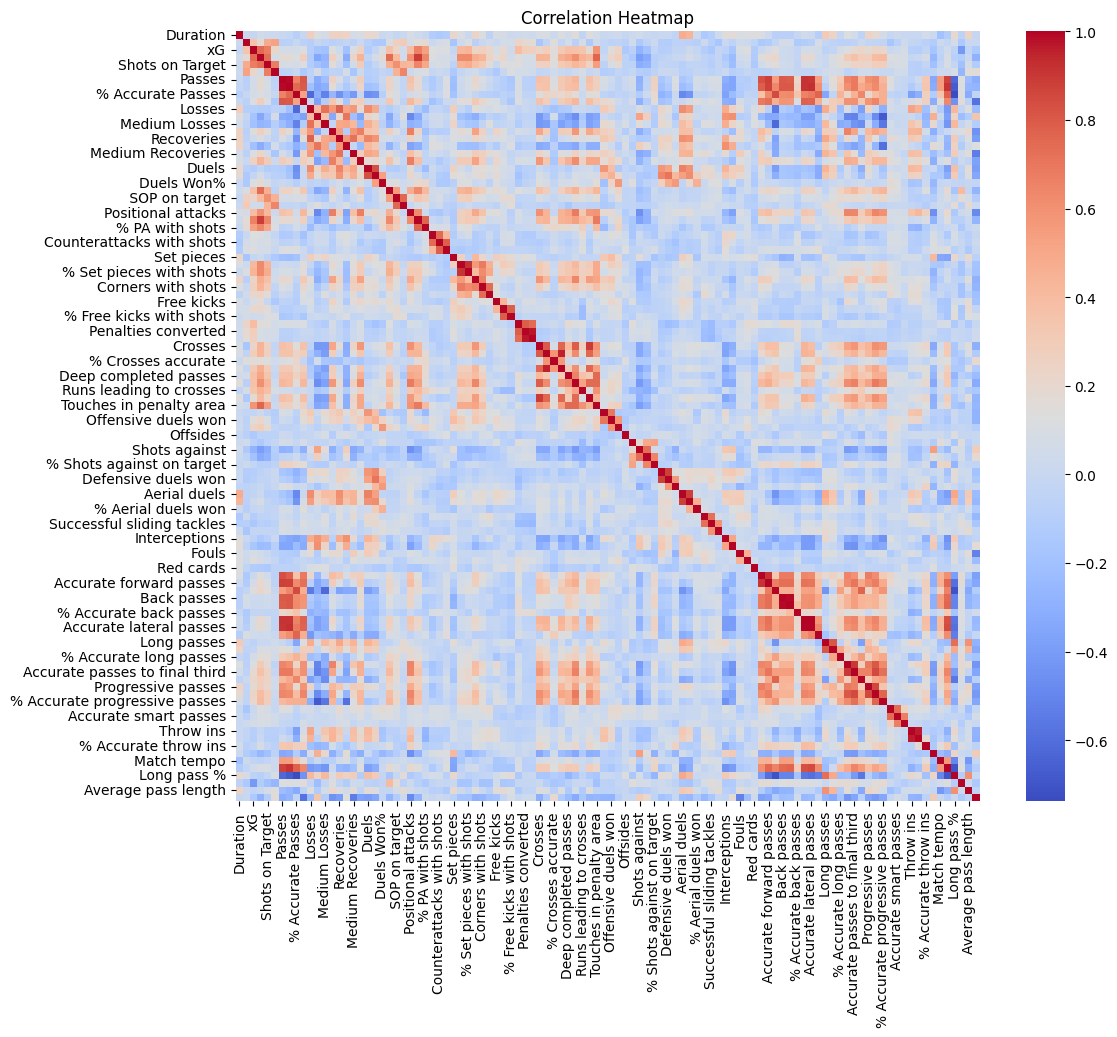

In [9]:
# Correlation Analysis

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


<Axes: title={'center': 'Goals vs xG Over Time'}, xlabel='Date'>

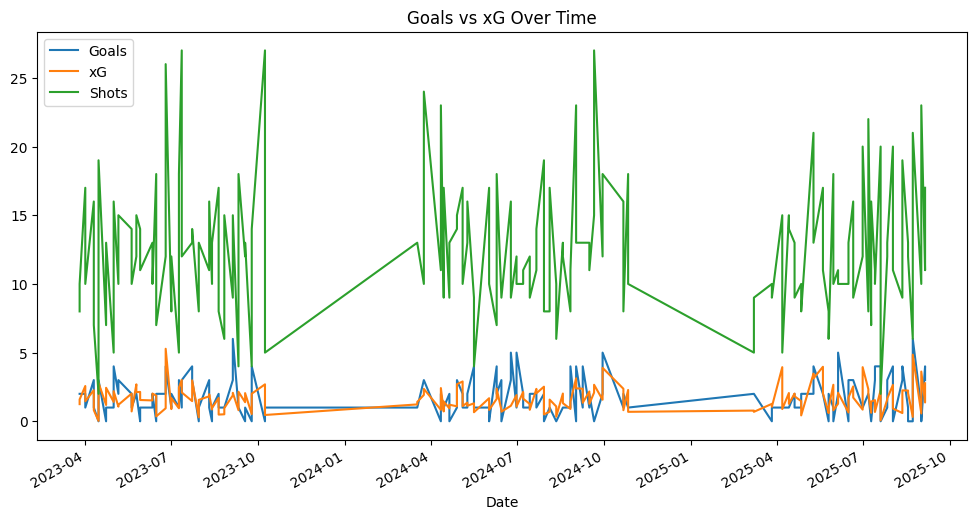

In [10]:
# Time-Based Trends

df.sort_values('Date', inplace=True)
df.set_index('Date')[['Goals', 'xG', 'Shots']].plot(figsize=(12, 6), title='Goals vs xG Over Time')


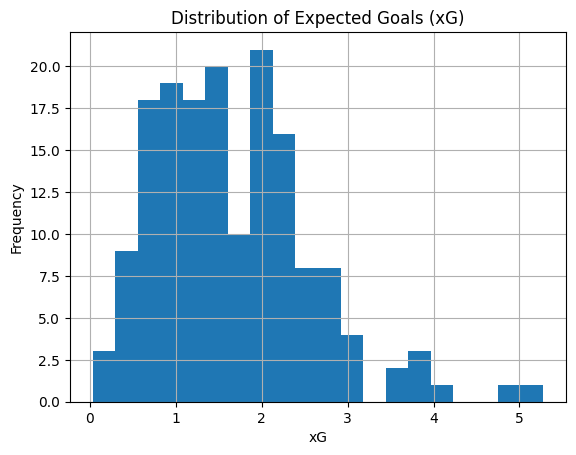

In [11]:
# Distributions & Histograms

df['xG'].hist(bins=20)
plt.title("Distribution of Expected Goals (xG)")
plt.xlabel("xG")
plt.ylabel("Frequency")
plt.show()


In [12]:
# Top Performances / Outliers

df.nlargest(5, 'Goals')[['Match', 'Goals', 'xG']]
df.nsmallest(5, 'PPDA')[['Match', 'PPDA']]  # Most aggressive pressing


,Match,PPDA
144,Crown Legacy FC - Philadelphia Union II (P) 2:2,4.18
20,Crown Legacy FC - Orlando City B 2:2 (P),4.95
114,Crown Legacy FC - New York RB II (P) 1:1,5.23
103,Chicago Fire II - Crown Legacy FC 2:0,5.53
53,Cincinnati II - Crown Legacy FC 1:2,5.80


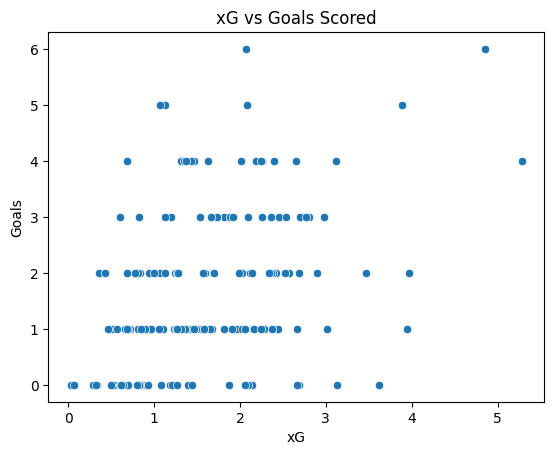

In [13]:
# Relationship Plots

sns.scatterplot(data=df, x='xG', y='Goals')
plt.title("xG vs Goals Scored")
plt.show()


In [14]:
# Grouped Comparisons

df.groupby('Scheme')[['Goals', 'xG', 'Shots']].mean().sort_values(by='Goals', ascending=False)


,Goals,xG,Shots
Scheme,,,
4-2-3-1 (85.14%),5.0,1.13,9.0
4-3-3 (91.9%),4.0,1.43,11.0
4-1-3-2 (49.59%),4.0,1.63,7.0
4-4-2 (88.12%),4.0,3.12,13.0
4-3-3 (68.23%),3.0,2.98,14.0
...,...,...,...
4-4-1-1 (97.47%),0.0,1.27,10.0
4-4-2 (51.49%),0.0,0.07,2.0
4-4-2 (49.51%),0.0,0.50,8.0


In [15]:
crown_df = df[df['Team'] == 'Crown Legacy FC'].copy()
crown_df.reset_index(drop=True, inplace=True)


In [16]:
defensive_kpis = [
    'Conceded goals', 'Shots against', 'Shots against on target',
    'Interceptions', 'Clearances', 'Fouls',
    'Sliding tackles', 'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

crown_def = crown_df[['Date', 'Match', 'Scheme'] + defensive_kpis].copy()


In [17]:
crown_def['Season'] = pd.to_datetime(crown_def['Date']).dt.year


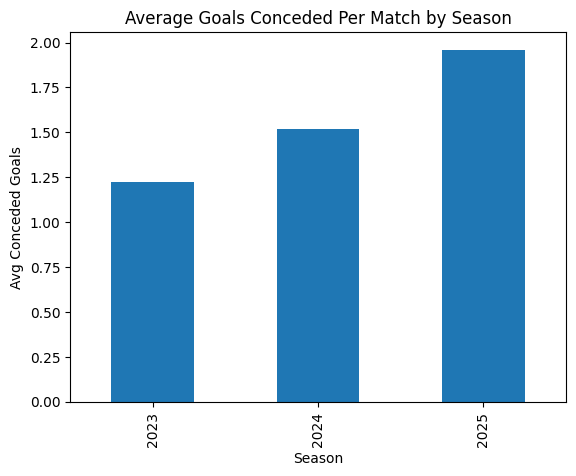

In [18]:
import matplotlib.pyplot as plt

crown_def.groupby('Season')['Conceded goals'].mean().plot(kind='bar')
plt.title('Average Goals Conceded Per Match by Season')
plt.ylabel('Avg Conceded Goals')
plt.xlabel('Season')
plt.show()


In [19]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X = crown_def[defensive_kpis].copy()
X = X.dropna()  # drop missing values for modeling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
crown_def['Cluster'] = kmeans.fit_predict(X_scaled)
    

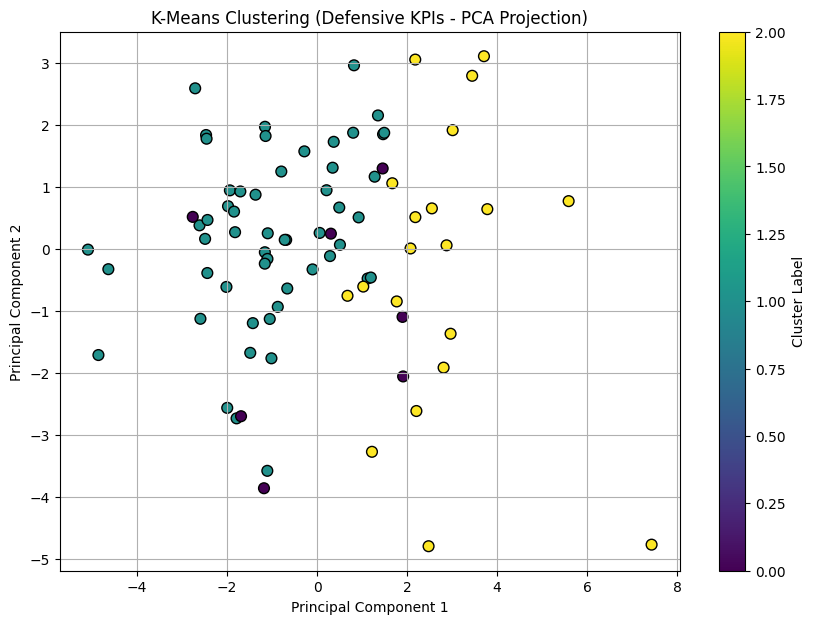

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Add cluster labels to your DataFrame
X_df = pd.DataFrame(X_scaled, columns=defensive_kpis)  # X_scaled is your standardized data
X_df['Cluster'] = kmeans.labels_

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Step 3: Create a plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    principal_components[:, 0],  # PC1
    principal_components[:, 1],  # PC2
    c=X_df['Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=60
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (Defensive KPIs - PCA Projection)')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


In [21]:
df_cl_only = df[df['Team'] == 'Crown Legacy FC'].copy()
df_cl_only['Cluster'] = kmeans.labels_

# Now summarize clusters
cluster_summary = df_cl_only.groupby('Cluster')[defensive_kpis].mean()
display(cluster_summary)


,Conceded goals,Shots against,Shots against on target,Interceptions,Clearances,Fouls,Sliding tackles,Successful sliding tackles,% Successful sliding tackles,Defensive duels,...,Aerial duels,Aerial duels won,% Aerial duels won,Recoveries,Duels,Duels Won,Duels Won%,PPDA,Yellow cards,Red cards
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.428571,18.571429,7.285714,43.714286,18.857143,12.571429,3.571429,2.142857,70.952857,73.571429,...,23.428571,8.571429,38.187143,70.285714,197.00000,95.285714,48.512857,12.718571,2.571429,1.000000
1,1.407407,10.981481,4.444444,32.481481,11.074074,13.666667,3.296296,1.555556,47.689630,71.185185,...,20.851852,9.148148,43.860926,68.000000,183.87037,86.925926,47.351852,11.237407,2.444444,0.055556
2,1.650000,11.400000,4.600000,42.500000,16.200000,14.650000,4.850000,2.700000,52.938000,78.150000,...,38.250000,17.500000,47.387500,87.200000,228.15000,109.750000,48.290000,8.281000,2.250000,0.050000


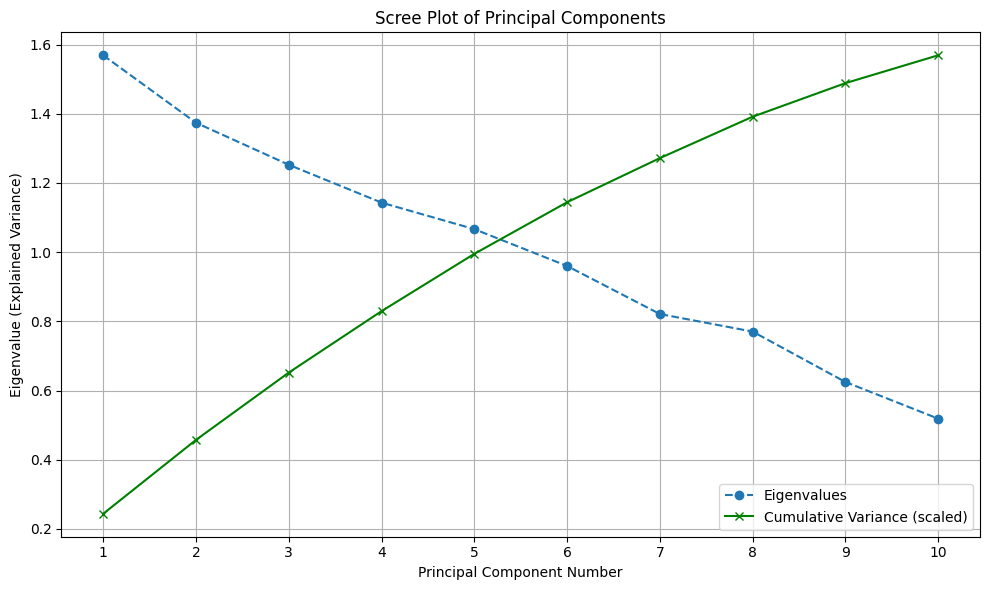

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Load your actual dataset here (replace this with your defensive features)
# Example below is dummy data — replace with your real DataFrame
# data = df_cl_only[defensive_kpis].dropna()  # Use this in your real notebook

# TEMP dummy data for testing
data = pd.DataFrame(np.random.rand(100, 10), columns=[f'feature_{i}' for i in range(10)])

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Run PCA
pca = PCA(n_components=None)
pca.fit(scaled_data)

# 4. Explained variance (eigenvalues)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# 5. Scree Plot
plt.figure(figsize=(10, 6))
components = np.arange(1, len(eigenvalues) + 1)

plt.plot(components, eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
plt.plot(components, cumulative_variance * max(eigenvalues), marker='x', linestyle='-', color='green', label='Cumulative Variance (scaled)')

plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.xticks(components)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


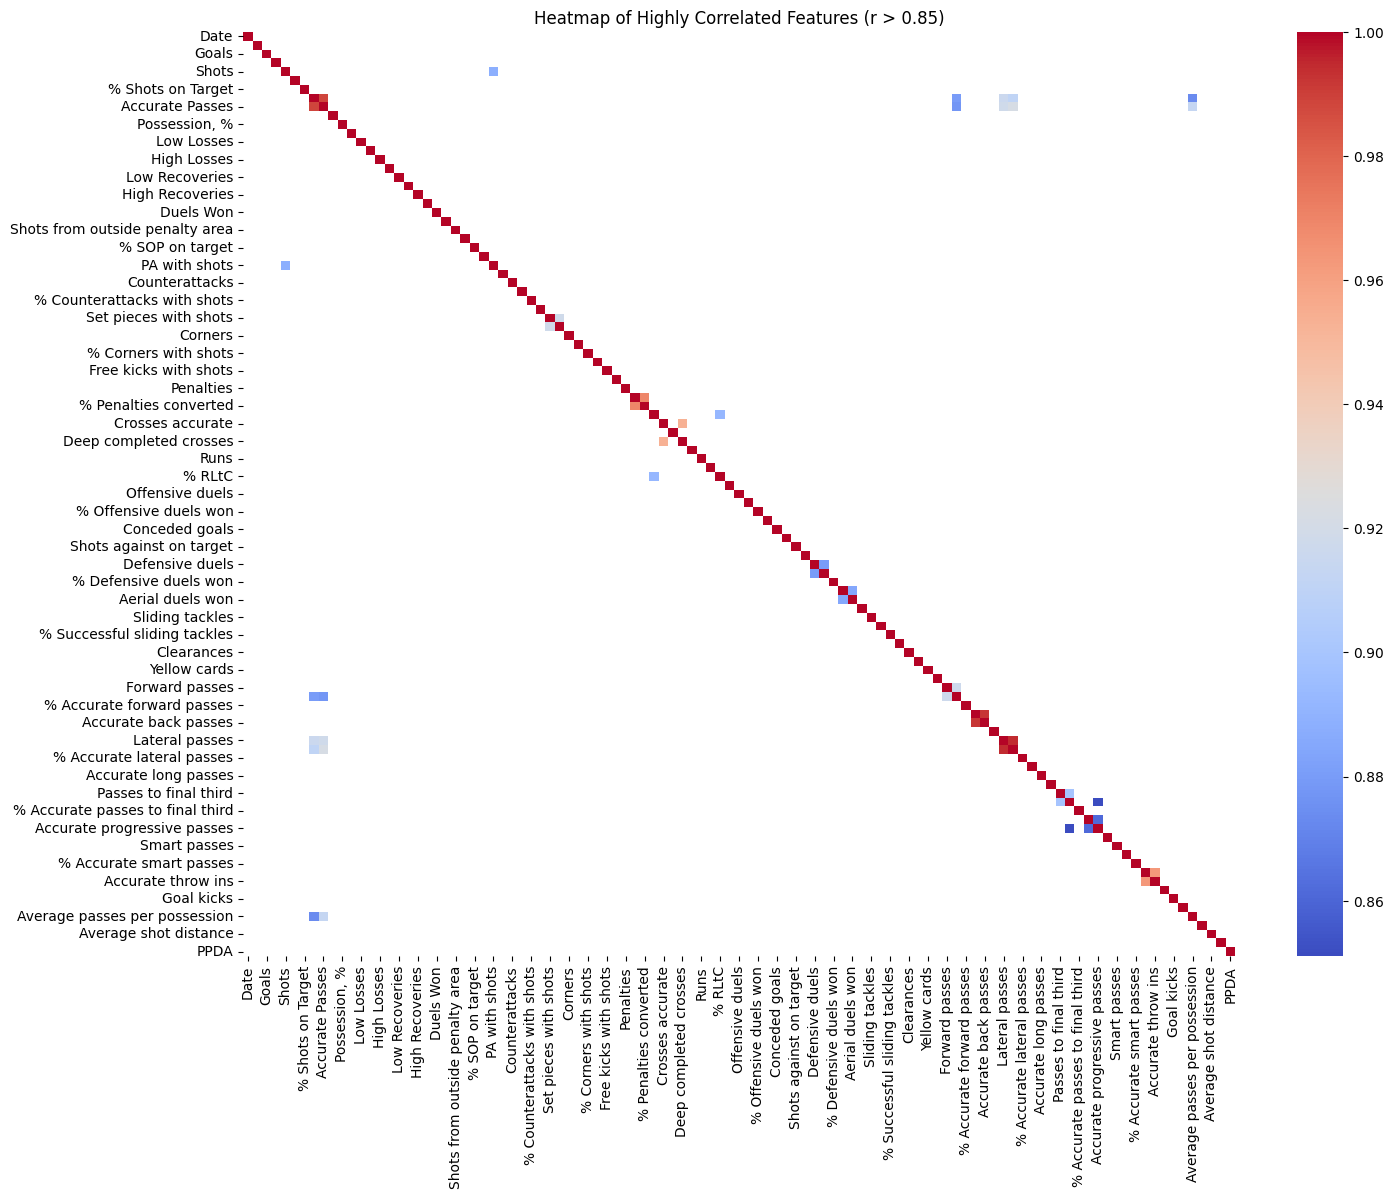

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert all columns to numeric if possible (non-convertible ones become NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop non-numeric or mostly NaN columns
df_numeric = df_numeric.dropna(axis=1, thresh=len(df_numeric) * 0.75)

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Plot heatmap for correlations above 0.85
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, mask=(corr_matrix < 0.85), cbar=True)
plt.title("Heatmap of Highly Correlated Features (r > 0.85)")
plt.show()


In [24]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_excel(r"C:\Users\jelli\OneDrive\Desktop\DSBA 6400\Crown Legacy Stats_FULL.xlsx")
df = df.iloc[2:].copy()
df.reset_index(drop=True, inplace=True)

# Convert all columns to numeric if possible (non-convertible ones become NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Drop mostly NaN columns
df_numeric = df_numeric.dropna(axis=1, thresh=len(df_numeric) * 0.75)

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Unstack the correlation matrix and remove self-correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs < 1.0]

# Drop duplicate pairs (A-B and B-A)
corr_pairs = corr_pairs.drop_duplicates()

# Filter and sort pairs with correlation above threshold (e.g., 0.85)
high_corr = corr_pairs[corr_pairs > 0.85].sort_values(ascending=False)

# Display the top correlated feature pairs
pd.set_option('display.max_rows', 100)  # show more rows if needed
display(high_corr)


Lateral passes                  Accurate lateral passes           0.994567
Back passes                     Accurate back passes              0.992273
Passes                          Accurate Passes                   0.988535
Penalties converted             % Penalties converted             0.969743
Throw ins                       Accurate throw ins                0.962778
Crosses accurate                Deep completed crosses            0.953293
Accurate Passes                 Accurate lateral passes           0.921581
Set pieces with shots           % Set pieces with shots           0.918286
Accurate Passes                 Lateral passes                    0.918058
Forward passes                  Accurate forward passes           0.917364
Passes                          Lateral passes                    0.915831
Accurate Passes                 Average passes per possession     0.912916
Passes                          Accurate lateral passes           0.910751
Passes to final third    

In [25]:
import numpy as np

# Step 1: Recalculate correlation matrix (if not already in memory)
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr().abs()

# Step 2: Get highly correlated feature pairs
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={"level_0": "Feature_1", "level_1": "Feature_2", 0: "Correlation"})
    .query("Correlation > 0.85")
    .sort_values(by="Correlation", ascending=False)
)

# Step 3: Logic to drop one feature from each pair
drop_keywords = ['accurate', '%', 'converted']

features_to_drop = []
for _, row in high_corr_pairs.iterrows():
    f1, f2 = row['Feature_1'], row['Feature_2']
    f1_lower = f1.lower()
    f2_lower = f2.lower()
    
    f1_has_keyword = any(keyword in f1_lower for keyword in drop_keywords)
    f2_has_keyword = any(keyword in f2_lower for keyword in drop_keywords)
    
    if f2_has_keyword and not f1_has_keyword:
        features_to_drop.append(f2)
    elif f1_has_keyword and not f2_has_keyword:
        features_to_drop.append(f1)
    # If both or neither match, you can add custom logic or skip

# Show the list of features recommended for dropping
print("🔻 Features suggested for removal due to high correlation:\n")
for feature in sorted(set(features_to_drop)):
    print("-", feature)


🔻 Features suggested for removal due to high correlation:

- % RLtC
- % Set pieces with shots
- Accurate Passes
- Accurate back passes
- Accurate forward passes
- Accurate lateral passes
- Accurate passes to final third
- Accurate progressive passes
- Accurate throw ins
- Crosses accurate


In [26]:
df_reduced = df.drop(columns=set(features_to_drop))


In [27]:
# Display the first few rows to inspect the data
print("Preview of df_reduced:")
display(df_reduced.head())

# Get the shape of the DataFrame
print(f"\n df_reduced shape: {df_reduced.shape} (rows, columns)")

# List remaining column names
print("\n Remaining columns:")
for col in df_reduced.columns:
    print("-", col)


Preview of df_reduced:


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,% Accurate smart passes,Throw ins,% Accurate throw ins,Goal kicks,Match tempo,Average passes per possession,Long pass %,Average shot distance,Average pass length,PPDA
0,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.0,2.77,17.0,4.0,...,100.0,19.0,89.47,4.0,15.00,4.40,8.28,19.22,21.08,8.58
1,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.0,1.37,11.0,9.0,...,0.0,13.0,100.00,5.0,15.40,2.91,19.34,19.15,22.95,17.67
2,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.0,3.62,23.0,5.0,...,0.0,26.0,96.15,2.0,15.72,3.38,9.12,14.93,19.57,8.14
3,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Orlando City B,4-4-2 (100.0%),1.0,0.57,10.0,3.0,...,0.0,25.0,88.00,12.0,15.85,3.95,8.09,20.28,19.37,8.72
4,2025-08-23,Crown Legacy FC - Inter Miami II 6:0,United States. MLS Next Pro,93.0,Crown Legacy FC,4-4-2 (100.0%),6.0,4.85,21.0,13.0,...,0.0,28.0,85.71,5.0,15.62,4.05,8.24,15.65,18.99,11.21



 df_reduced shape: (162, 99) (rows, columns)

 Remaining columns:
- Date
- Match
- Competition
- Duration
- Team
- Scheme
- Goals
- xG
- Shots
- Shots on Target
- % Shots on Target
- Passes
- % Accurate Passes
- Possession, %
- Losses
- Low Losses
- Medium Losses
- High Losses
- Recoveries
- Low Recoveries
- Medium Recoveries
- High Recoveries
- Duels
- Duels Won
- Duels Won%
- Shots from outside penalty area
-  SOP on target
- % SOP on target
- Positional attacks
- PA with shots
- % PA with shots
- Counterattacks
- Counterattacks with shots
- % Counterattacks with shots
- Set pieces
- Set pieces with shots
- Corners
- Corners with shots
- % Corners with shots
- Free kicks
- Free kicks with shots
- % Free kicks with shots
- Penalties
- Penalties converted
- % Penalties converted
- Crosses
- % Crosses accurate
- Deep completed crosses
- Deep completed passes
- Runs
- Runs leading to crosses
- Touches in penalty area
- Offensive duels
- Offensive duels won
- % Offensive duels won
- Offs

In [28]:
# Defensive KPI's that are also relevant features (based on correlation analysis):


# - Conceded goals  
# - Shots against  
# - Shots against on target  
# - Interceptions  
# - Clearances  
# - Fouls  
# - Sliding tackles  
# - Successful sliding tackles  
# - % Successful sliding tackles  
# - Defensive duels  
# - Defensive duels won  
# - % Defensive duels won  
# - Aerial duels  
# - Aerial duels won  
# - % Aerial duels won  
# - Recoveries  
# - Duels  
# - Duels Won  
# - Duels Won%  
# - PPDA  
# - Yellow cards  
# - Red cards  


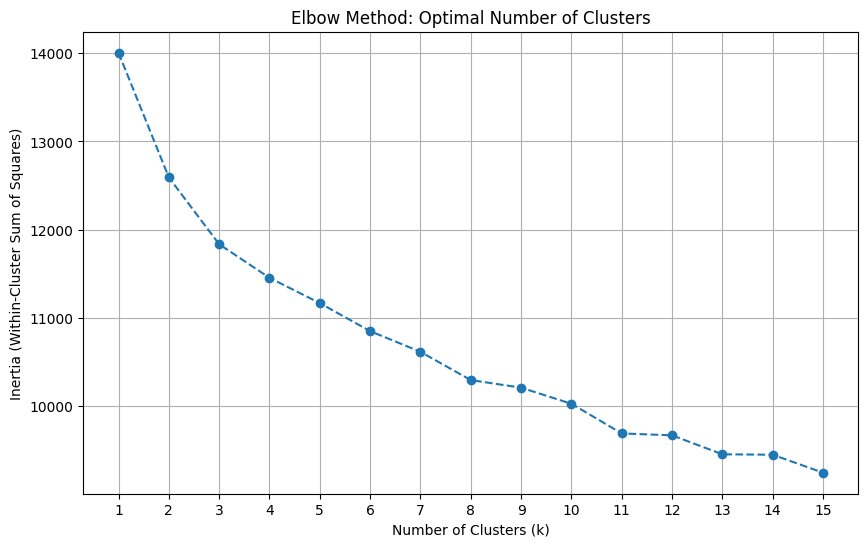

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Select numeric data only
df_cluster = df_reduced.select_dtypes(include='number')

# Step 2: Drop rows with missing values (only for clustering purposes)
df_cluster_clean = df_cluster.dropna()

# Step 3: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster_clean)

# Step 4: Elbow method
inertia = []
k_range = range(1, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Step 5: Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.xticks(k_range)
plt.show()


In [30]:
# There's a sharp drop in inertia from k=1 to k=3.
# The decrease becomes more gradual between k=4 and k=6.
# After k=6 or 7, the curve flattens quite a bit, indicating diminishing returns as more clusters are added.

In [31]:
# k = 4
# This gives a nice balance between simplicity and insight without overcomplicating the clusters.


In [32]:
# 2b. Drop rows with missing values before PCA
df_cleaned = df_reduced.dropna().reset_index(drop=True)

# 3. Extract numeric features and scale
numeric_cols = df_cleaned.select_dtypes(include='number').columns
X = df_cleaned[numeric_cols]
scaled_X = scaler.fit_transform(X)

# 4. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)

# 5. KMeans clustering (use k=4 or your preferred number)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_X)

# 6. Add cluster labels and PCA components back to the DataFrame
df_cleaned['Cluster'] = clusters
df_cleaned['PC1'] = X_pca[:, 0]
df_cleaned['PC2'] = X_pca[:, 1]


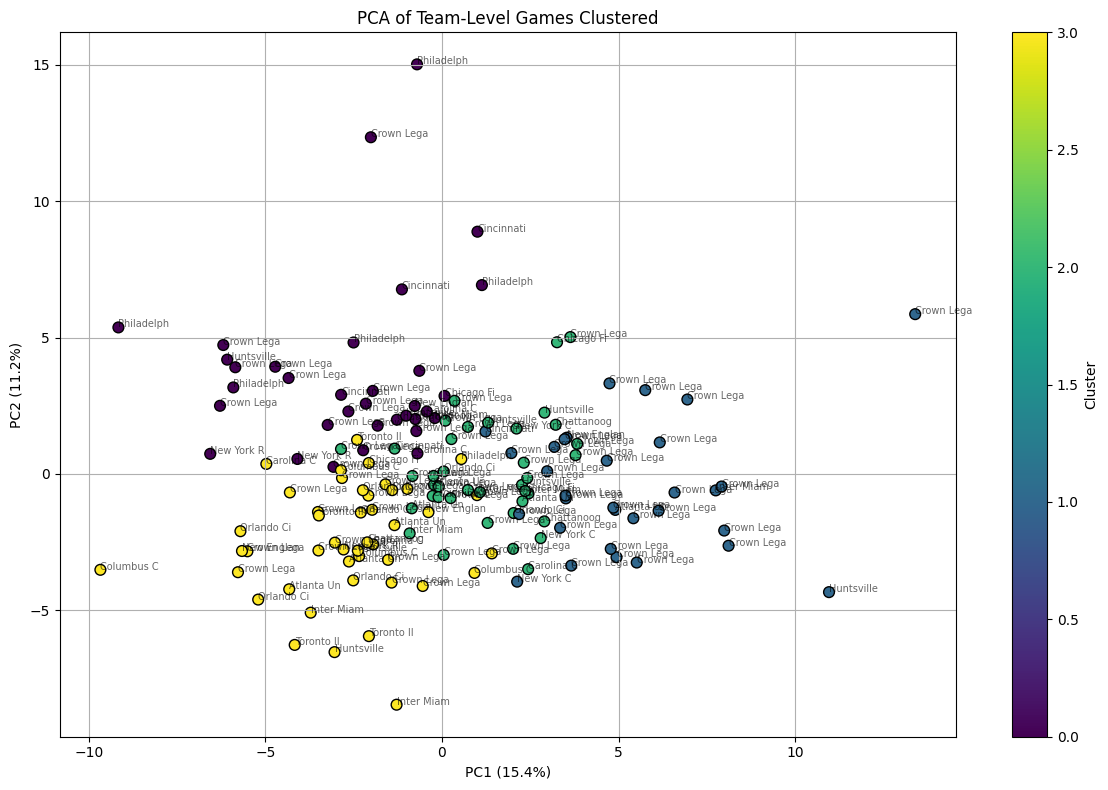

In [33]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_cleaned['PC1'], df_cleaned['PC2'],
                      c=df_cleaned['Cluster'], cmap='viridis', s=60, edgecolor='k')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA of Team-Level Games Clustered')
plt.colorbar(scatter, label='Cluster')

# Optional: label points with team or match
for i, row in df_cleaned.iterrows():
    label = f"{row['Team'][:10]}"
    plt.text(row['PC1'], row['PC2'], label, fontsize=7, alpha=0.6)

plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Get the names of numeric features
feature_names = numeric_cols  # same as the ones used in scaled_X

# Create a DataFrame of PCA loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)

# Display top contributing features for each component
for pc in loadings.columns:
    print(f"\nTop features for {pc}:")
    print(loadings[pc].sort_values(ascending=False).head(5))



Top features for PC1:
Runs                             0.206063
% Accurate progressive passes    0.200229
Passes                           0.192958
Positional attacks               0.191863
Lateral passes                   0.190569
Name: PC1, dtype: float64

Top features for PC2:
Recoveries      0.244766
Duels           0.237212
Losses          0.236792
Aerial duels    0.231136
Duels Won       0.224321
Name: PC2, dtype: float64


In [35]:
# Principal Component 1 (PC1): Overall Ball Progression & Possession Play

# Top contributors:

# -Runs
# -% Accurate progressive passes
# -Passes
# -Positional attacks
# -Lateral passes

##########################################################

# Interpretation:

# PC1 seems to represent a possession-based or build-up style of play.

# Teams or matches with high PC1 scores likely:
# -Keep the ball more often,
# -Build attacks through progressive passing,
# -Use structured, positional play,
# -Involve more runs off the ball and lateral movement to maintain possession.
# -In short, PC1 reflects how controlled, patient, and possession-oriented the team’s play is.

##########################################################

# could label PC1 as something like:
# “Possession & Progression Index” or “Build-Up Play Component.”

In [36]:
# Principal Component 2 (PC2): Defensive Engagement & Duel Intensity

# Top contributors:

# -Recoveries
# -Duels
# -Losses
# -Aerial duels
# -Duels Won

##########################################################

# Interpretation:

# PC2 measures the intensity of physical defensive actions — especially ground and aerial duels.

# Matches with high PC2 scores suggest the team was:
# -Heavily involved in defensive contests (lots of duels),
# -Active in recovering possession,
# -Sometimes losing the ball more (indicating a scrappier, high-contact style).
# -This axis captures how physically involved and aggressive the team’s defense was.

In [37]:
# Summary of What These Mean Together: 

# | Component | Represents                       | Example Match Style (High Value)                       |
# | --------- | -------------------------------- | ------------------------------------------------------ |
# | **PC1**   | Possession & progression         | Patient build-up, accurate passing, positional attacks |
# | **PC2**   | Defensive engagement & intensity | Active duels, recoveries, high defensive pressure      |


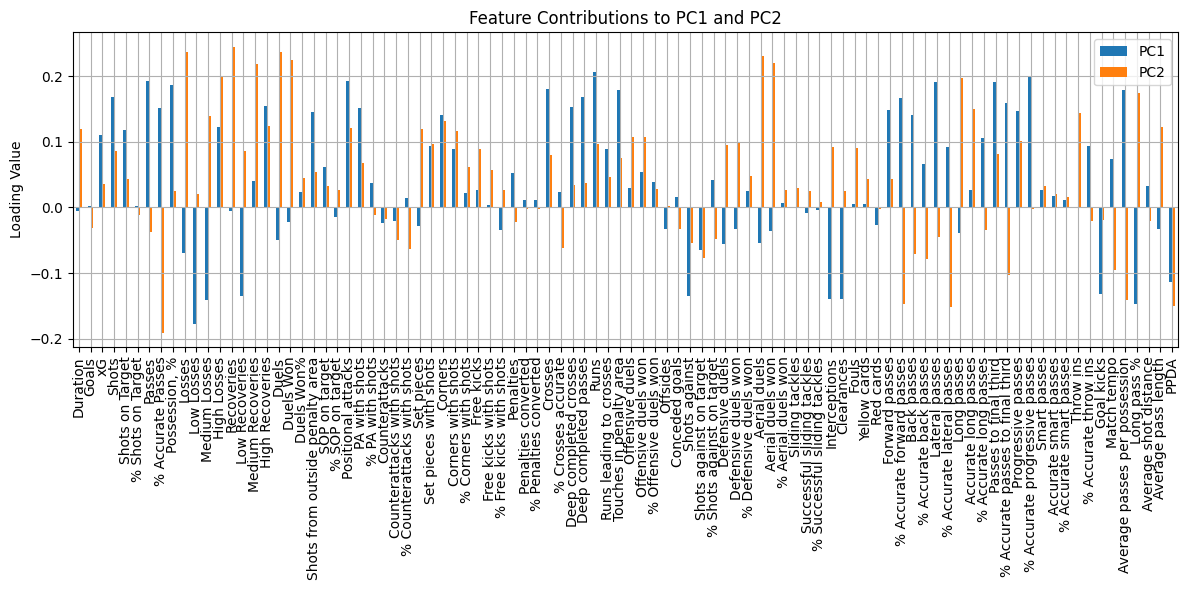

In [38]:
loadings[['PC1', 'PC2']].plot.bar(figsize=(12, 6))
plt.title("Feature Contributions to PC1 and PC2")
plt.ylabel("Loading Value")
plt.grid(True)
plt.tight_layout()
plt.show()


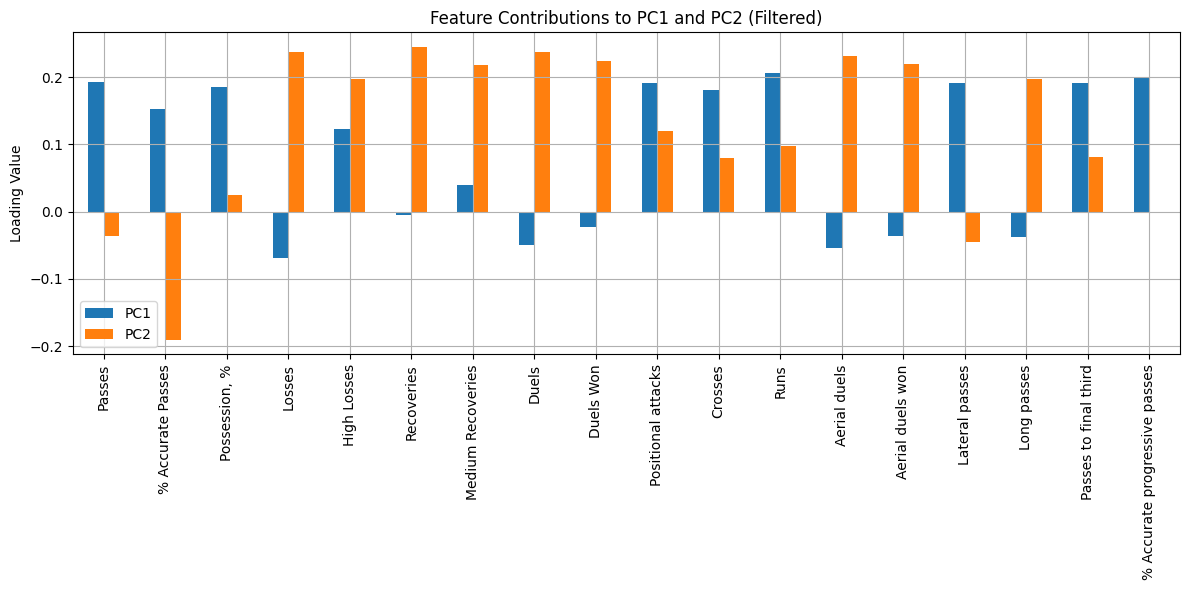

In [73]:
# Define a threshold for importance
threshold = 0.18

# Keep features that contribute significantly to either PC1 or PC2
important_features = loadings[(loadings['PC1'].abs() > threshold) | 
                              (loadings['PC2'].abs() > threshold)]

# Plot only the important ones
important_features[['PC1', 'PC2']].plot.bar(figsize=(12, 6))
plt.title("Feature Contributions to PC1 and PC2 (Filtered)")
plt.ylabel("Loading Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd
import numpy as np

# After fitting PCA:
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(scaled_X)

# Create a DataFrame of loadings (weights)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose so features are rows
    index=numeric_cols,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Show top 5 weighted features for each principal component
for pc in loadings.columns:
    print(f"\nTop features for {pc}:")
    print(loadings[pc].abs().sort_values(ascending=False).head(5))



Top features for PC1:
Runs                             0.206063
% Accurate progressive passes    0.200229
Passes                           0.192958
Positional attacks               0.191863
Lateral passes                   0.190569
Name: PC1, dtype: float64

Top features for PC2:
Recoveries      0.244766
Duels           0.237212
Losses          0.236792
Aerial duels    0.231136
Duels Won       0.224321
Name: PC2, dtype: float64


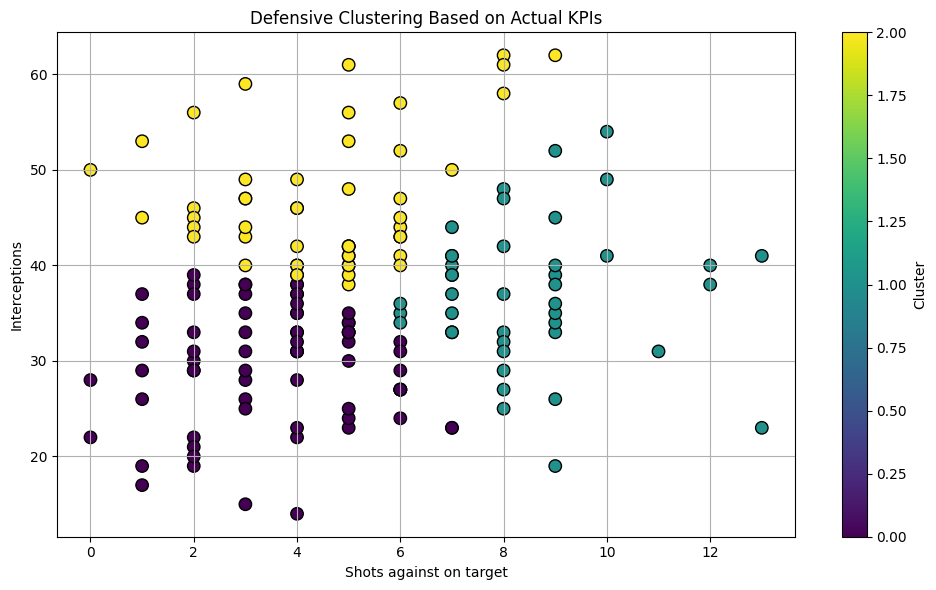

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select the two KPI columns
x_kpi = 'Shots against on target'
y_kpi = 'Interceptions'
data_kpis = df_reduced[[x_kpi, y_kpi]].dropna()

# 2. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_kpis)

# 3. Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_data)

# 4. Add cluster labels back to the original (unscaled) DataFrame
data_kpis['Cluster'] = labels

# 5. Plot with ACTUAL KPI names on axes
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data_kpis[x_kpi],
    data_kpis[y_kpi],
    c=data_kpis['Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=80
)

plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.title('Defensive Clustering Based on Actual KPIs')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


For n_clusters = 2, the average silhouette_score is : 0.351
For n_clusters = 3, the average silhouette_score is : 0.338
For n_clusters = 4, the average silhouette_score is : 0.348
For n_clusters = 5, the average silhouette_score is : 0.331
For n_clusters = 6, the average silhouette_score is : 0.345


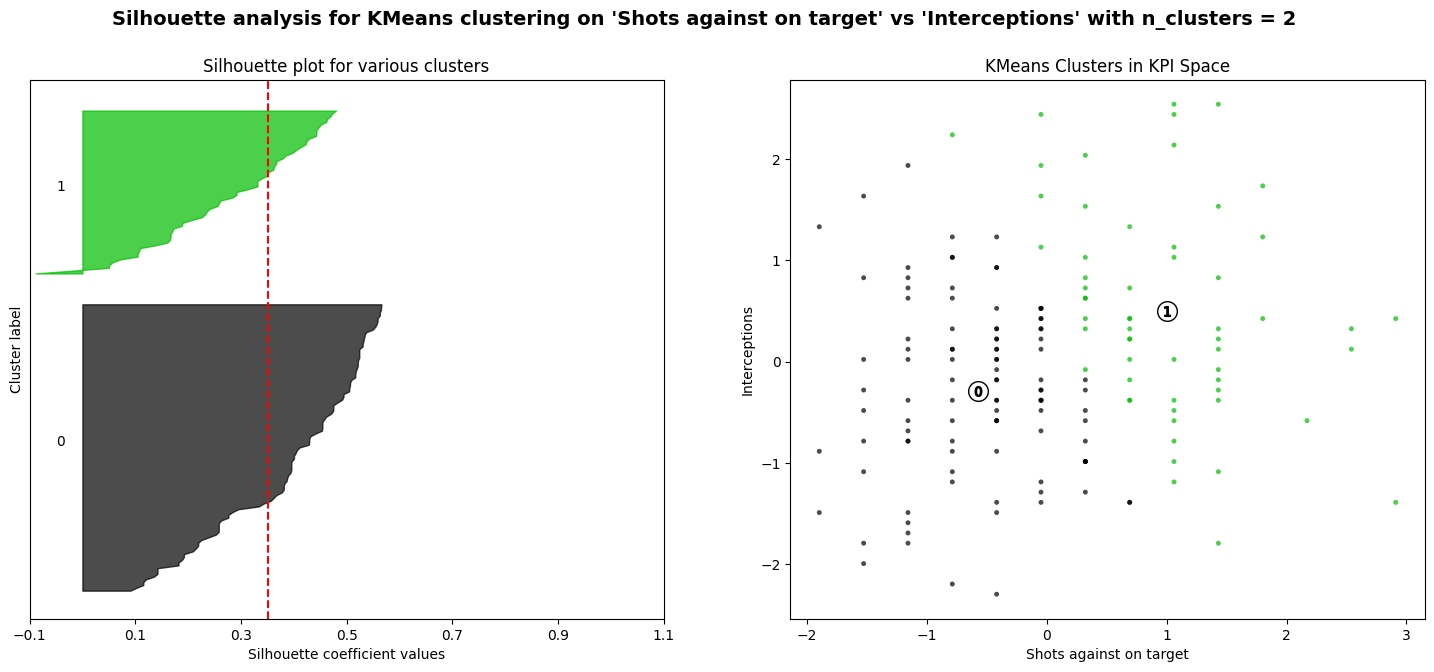

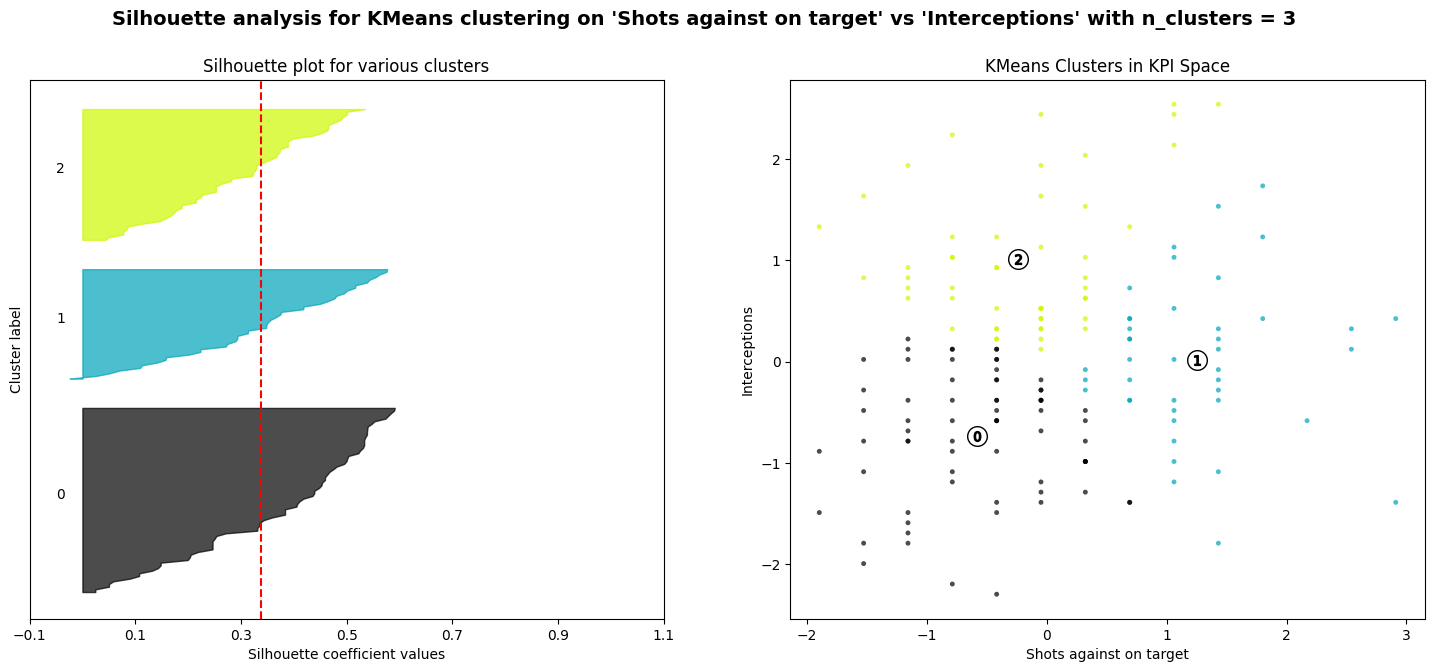

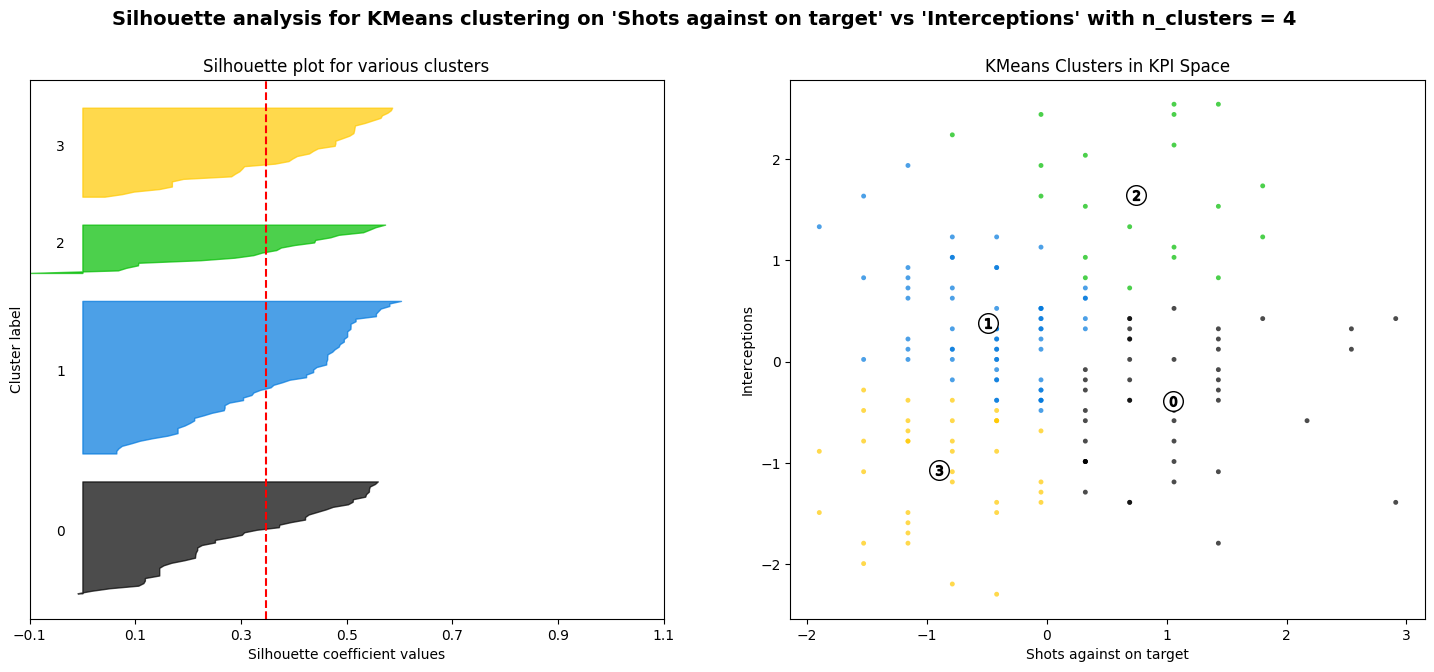

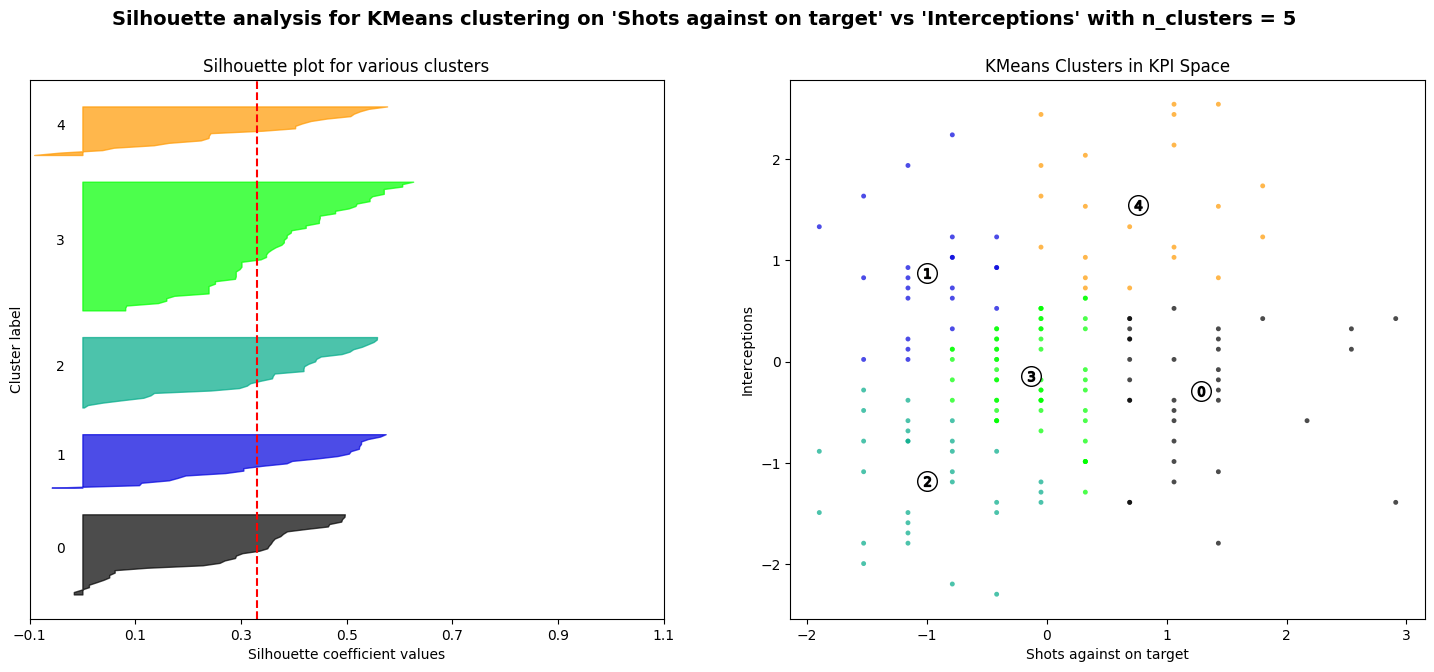

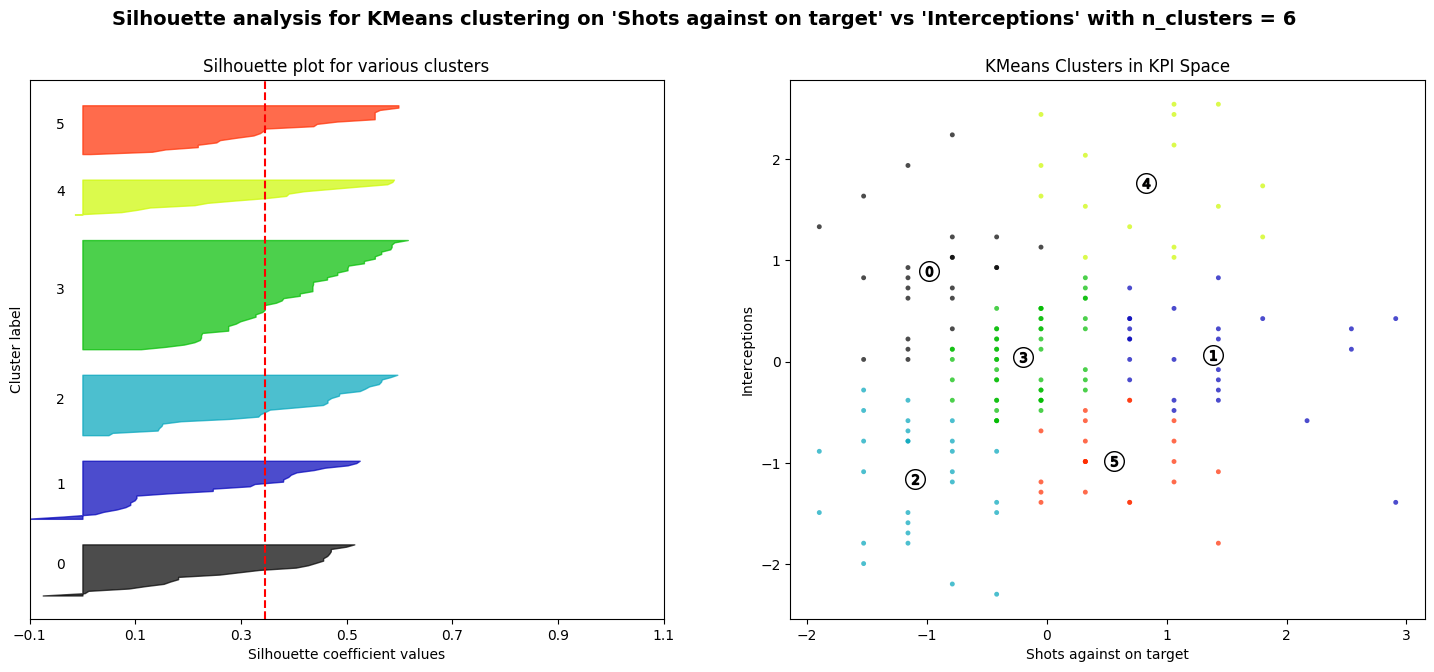

In [42]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# 1. Select your two KPI columns
x_kpi = 'Shots against on target'
y_kpi = 'Interceptions'
data_kpis = df_reduced[[x_kpi, y_kpi]].dropna()

# 2. Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data_kpis)

# 3. Define range of clusters to test
range_n_clusters = [2, 3, 4, 5, 6]

# 4. Loop through different cluster counts
for n_clusters in range_n_clusters:
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Setup for the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Fit KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Collect silhouette scores for cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    # 2nd plot — actual clusters in KPI space
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1],
        marker=".", s=50, lw=0, alpha=0.7,
        c=colors, edgecolor="k"
    )

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker="o", c="white", alpha=1, s=200, edgecolor="k")

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker=f"${i}$", alpha=1, s=50, edgecolor="k")

    ax2.set_title("KMeans Clusters in KPI Space")
    ax2.set_xlabel(x_kpi)
    ax2.set_ylabel(y_kpi)

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering on '{x_kpi}' vs '{y_kpi}' with n_clusters = {n_clusters}",
        fontsize=14, fontweight="bold"
    )

plt.show()


Average silhouette score for n_clusters = 4 : 0.08605715354657241


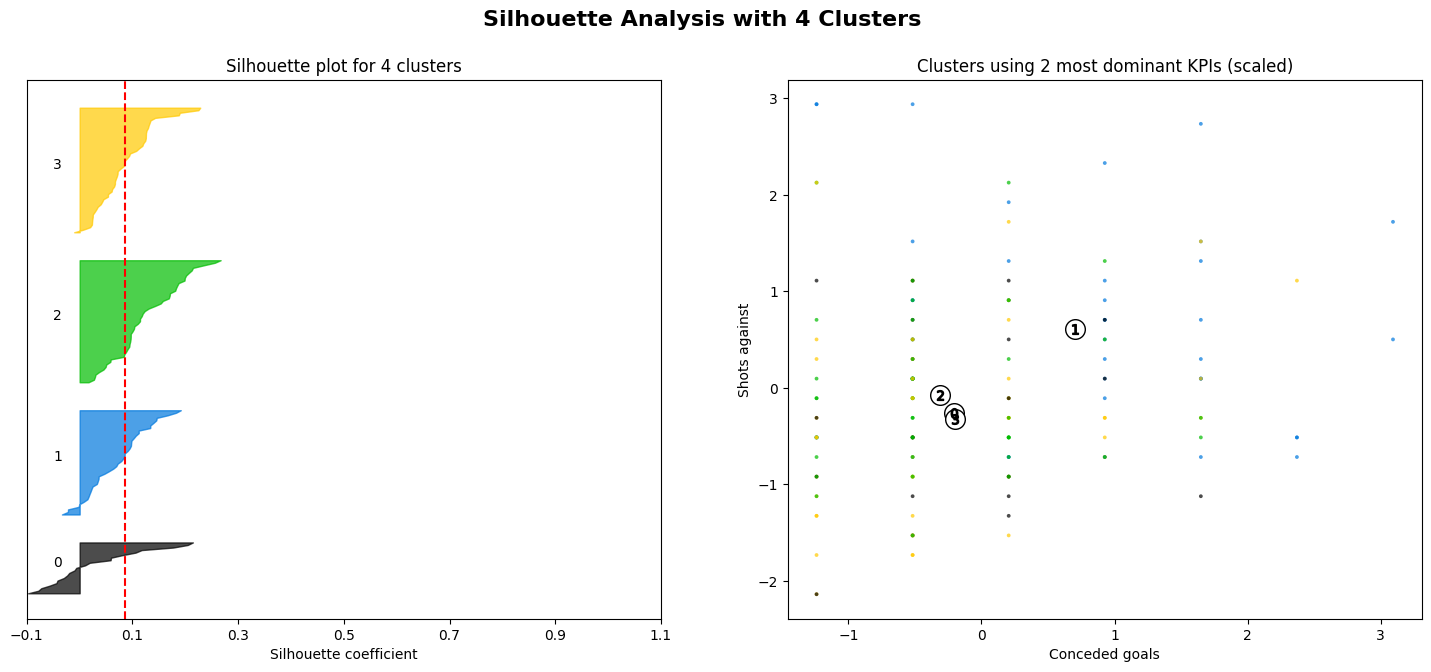

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

# Load data
# df = pd.read_excel("Crown Legacy Stats_FULL.xlsx")

# Defensive KPIs only
defensive_kpis = [
    'Conceded goals', 'Shots against', 'Shots against on target',
    'Interceptions', 'Clearances', 'Fouls',
    'Sliding tackles', 'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

# Filter dataset
df_kpis = df[defensive_kpis].copy()

# Drop rows with any missing values
df_kpis.dropna(inplace=True)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kpis)

# Silhouette analysis for n_clusters = 4
n_clusters = 4
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# First subplot — silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = clusterer.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Average silhouette score for n_clusters =", n_clusters, ":", silhouette_avg)

sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for 4 clusters")
ax1.set_xlabel("Silhouette coefficient")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# Second subplot — scatterplot of clusters using first 2 KPIs
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

centers = clusterer.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("Clusters using 2 most dominant KPIs (scaled)")
ax2.set_xlabel(defensive_kpis[0])
ax2.set_ylabel(defensive_kpis[1])

plt.suptitle("Silhouette Analysis with 4 Clusters", fontsize=16, fontweight='bold')
plt.show()


In [44]:
from sklearn.preprocessing import StandardScaler

# Select your relevant features
features = [
    'Conceded goals', 'Shots against', 'Shots against on target', 
    'Interceptions', 'Clearances', 'Fouls', 'Sliding tackles',
    'Successful sliding tackles', '% Successful sliding tackles',
    'Defensive duels', 'Defensive duels won', '% Defensive duels won',
    'Aerial duels', 'Aerial duels won', '% Aerial duels won',
    'Recoveries', 'Duels', 'Duels Won', 'Duels Won%',
    'PPDA', 'Yellow cards', 'Red cards'
]

X = df[features].copy()

# Convert percentage columns to proportions if needed
percent_cols = [col for col in X.columns if "%" in col]
for col in percent_cols:
    if X[col].max() > 1:
        X[col] /= 100

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
import numpy as np

# Euclidean distance helper
def euclidean_distance(a,b):
    d = np.sqrt(np.sum((a - b)**2))
    return d

# Custom KMeans class
class Kmeans:
    def __init__(self, k=3, max_iter=100, tol=1e-06):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol

    def pick_centers(self, X):
        centers_idxs = np.random.choice(self.n_samples, self.k)
        return X[centers_idxs]

    def get_closest_centroid(self, x, centroids):
        distances = [euclidean_distance(x, centroid) for centroid in centroids]
        return np.argmin(distances)

    def create_clusters(self, centroids, X):
        clusters = [[] for _ in range(self.k)]
        labels = np.empty(self.n_samples)
        for i, x in enumerate(X):
            centroid_idx = self.get_closest_centroid(x, centroids)
            clusters[centroid_idx].append(i)
            labels[i] = centroid_idx
        return clusters, labels

    def compute_centroids(self, clusters, X):
        centroids = np.empty((self.k, self.n_features))
        for i, cluster in enumerate(clusters):
            centroids[i] = np.mean(X[cluster], axis=0)
        return centroids

    def is_converged(self, old_centroids, new_centroids):
        distances = [euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.k)]
        return (sum(distances) < self.tol)

    def fit_predict(self, X):
        self.n_samples, self.n_features = X.shape
        self.centroids = self.pick_centers(X)
        for i in range(self.max_iter):
            self.clusters, self.labels = self.create_clusters(self.centroids, X)
            new_centroids = self.compute_centroids(self.clusters, X)
            if self.is_converged(self.centroids, new_centroids):
                break
            self.centroids = new_centroids

    def clustering_errors(self, X):
        cluster_values = [X[cluster] for cluster in self.clusters]
        squared_distances = []
        for i, cluster_array in enumerate(cluster_values):
            squared_distances.append(np.sum((cluster_array - self.centroids[i])**2))
        total_error = np.sum(squared_distances)
        return total_error


In [47]:
# Assign clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Analyze average features by cluster
cluster_summary = df.groupby('Cluster')[features].mean()


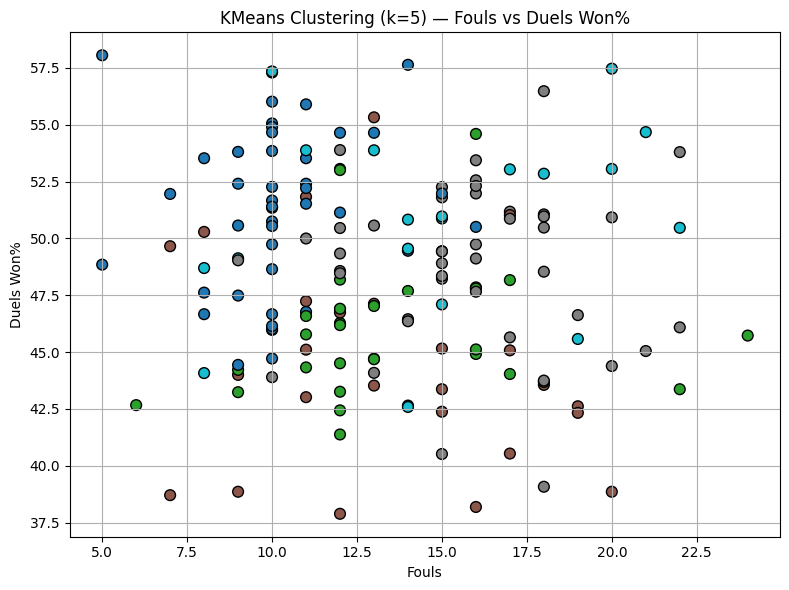

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Choose the number of clusters 
k = 5

# Run KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Attach labels to the original (unscaled) data
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# Pick two KPIs to visualize
x_kpi = 'Fouls'
y_kpi = 'Duels Won%'

# Scatter Plot using actual KPI values
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_clustered[x_kpi],
    df_clustered[y_kpi],
    c=df_clustered['Cluster'],
    cmap='tab10',
    s=60,
    edgecolor='black'
)

plt.title(f'KMeans Clustering (k={k}) — {x_kpi} vs {y_kpi}')
plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
from sklearn.cluster import KMeans

# Use standardized KPI data
k = 4  # or change to 5 for comparison
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df_clustered = df.copy()
df_clustered['Cluster'] = labels


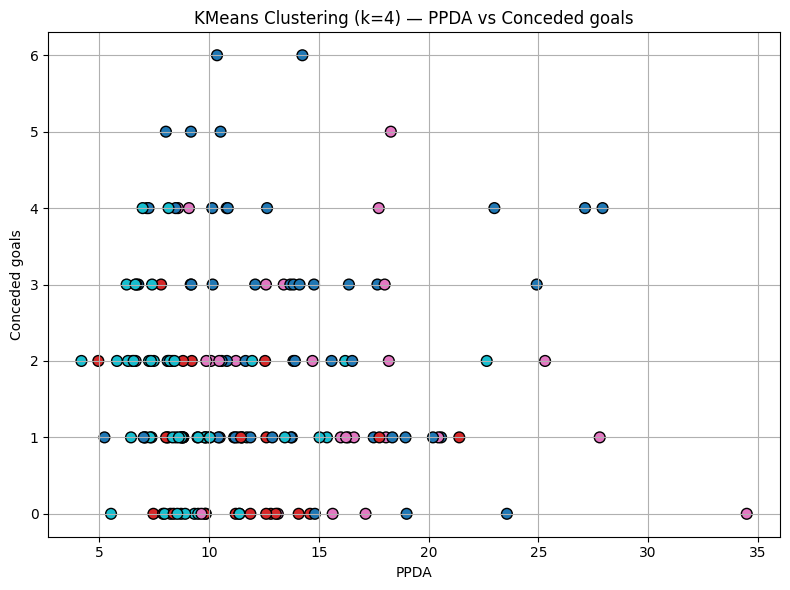

In [50]:
import matplotlib.pyplot as plt

x_kpi = 'PPDA'
y_kpi = 'Conceded goals'

plt.figure(figsize=(8, 6))
plt.scatter(
    df_clustered[x_kpi],
    df_clustered[y_kpi],
    c=df_clustered['Cluster'],
    cmap='tab10',
    s=60,
    edgecolors='k'
)
plt.title(f'KMeans Clustering (k={k}) — {x_kpi} vs {y_kpi}')
plt.xlabel(x_kpi)
plt.ylabel(y_kpi)
plt.grid(True)
plt.tight_layout()
plt.show()


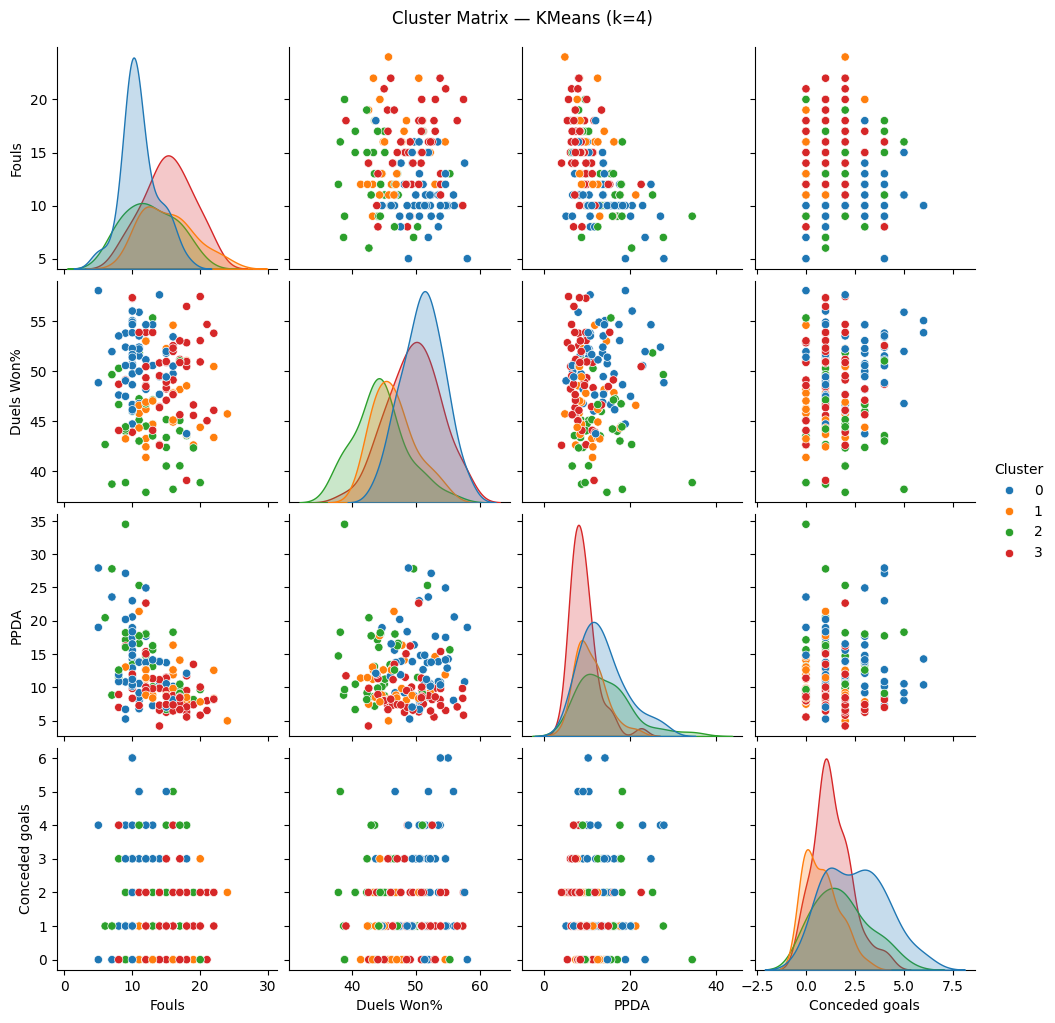

In [51]:
import seaborn as sns

selected_kpis = ['Fouls', 'Duels Won%', 'PPDA', 'Conceded goals']
sns.pairplot(df_clustered[selected_kpis + ['Cluster']], hue='Cluster', palette='tab10')
plt.suptitle(f'Cluster Matrix — KMeans (k={k})', y=1.02)
plt.show()


In [52]:
df_reduced.columns.tolist()

['Date',
 'Match',
 'Competition',
 'Duration',
 'Team',
 'Scheme',
 'Goals',
 'xG',
 'Shots',
 'Shots on Target',
 '% Shots on Target',
 'Passes',
 '% Accurate Passes',
 'Possession, %',
 'Losses',
 'Low Losses',
 'Medium Losses',
 'High Losses',
 'Recoveries',
 'Low Recoveries',
 'Medium Recoveries',
 'High Recoveries',
 'Duels',
 'Duels Won',
 'Duels Won%',
 'Shots from outside penalty area',
 ' SOP on target',
 '% SOP on target',
 'Positional attacks',
 'PA with shots',
 '% PA with shots',
 'Counterattacks',
 'Counterattacks with shots',
 '% Counterattacks with shots',
 'Set pieces',
 'Set pieces with shots',
 'Corners',
 'Corners with shots',
 '% Corners with shots',
 'Free kicks',
 'Free kicks with shots',
 '% Free kicks with shots',
 'Penalties',
 'Penalties converted',
 '% Penalties converted',
 'Crosses',
 '% Crosses accurate',
 'Deep completed crosses',
 'Deep completed passes',
 'Runs',
 'Runs leading to crosses',
 'Touches in penalty area',
 'Offensive duels',
 'Offensive d

In [53]:
# Offensive process KPIs:

# 'Shots',
# 'Shots on Target',
# '% Shots on Target',
# 'xG',
# 'Possession, %',
# 'Passes',
# '% Accurate Passes',
# 'Crosses',
# '% Crosses accurate',
# 'Deep completed crosses',
# 'Deep completed passes',
# 'Runs',
# 'Runs leading to crosses',
# 'Touches in penalty area',
# 'Offensive duels',
# '% Offensive duels won',
# 'Forward passes',
# '% Accurate forward passes',
# 'Back passes',
# '% Accurate back passes',
# 'Lateral passes',
# '% Accurate lateral passes',
# 'Long passes',
# '% Accurate long passes',
# 'Passes to final third',
# '% Accurate passes to final third',
# 'Progressive passes',
# '% Accurate progressive passes',
# 'Smart passes',
# '% Accurate smart passes',
# 'Throw ins',
# '% Accurate throw ins',
# 'Average pass length',
# 'Average shot distance',
# 'Average passes per possession',
# 'Long pass %',
# 'Match tempo',
# 'PPDA'


In [54]:
# Defensive process KPIs:

# 'Shots against',
# 'Shots against on target',
# '% Shots against on target',
# 'Defensive duels',
# '% Defensive duels won',
# 'Aerial duels',
# '% Aerial duels won',
# 'Sliding tackles',
# '% Successful sliding tackles',
# 'Interceptions',
# 'Clearances',
# 'Recoveries',
# 'Low Recoveries',
# 'Medium Recoveries',
# 'High Recoveries',
# 'Losses',
# 'Low Losses',
# 'Medium Losses',
# 'High Losses'


In [55]:
# Columns to exclude (outcome-based)

# 'Goals',
# 'Penalties converted',
# '% Penalties converted',
# 'Conceded goals',
# 'Yellow cards',
# 'Red cards',
# 'Corners with shots',
# '% Corners with shots',
# 'Counterattacks with shots',
# '% Counterattacks with shots',
# 'PA with shots',
# '% PA with shots',
# 'Set pieces with shots',
# '% Set pieces with shots'


In [56]:
# =========================================
# PART 1 — Import Libraries
# =========================================
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [57]:
# =========================================
# PART 2 — Load and Prepare Process-Oriented KPI Data
# =========================================

import pandas as pd

# 1. Load your Excel file into a DataFrame
Crown_Legacy_Stats_FULL = pd.read_excel("Crown Legacy Stats_FULL.xlsx")

# 2. Select process-oriented KPI columns
process_kpis = [
    # Offensive
    'Shots','Shots on Target','% Shots on Target','xG','Possession, %',
    'Passes','% Accurate Passes','Crosses','% Crosses accurate',
    'Deep completed crosses','Deep completed passes','Runs','Runs leading to crosses',
    'Touches in penalty area','Offensive duels','% Offensive duels won',
    'Forward passes','% Accurate forward passes','Back passes','% Accurate back passes',
    'Lateral passes','% Accurate lateral passes','Long passes','% Accurate long passes',
    'Passes to final third','% Accurate passes to final third','Progressive passes',
    '% Accurate progressive passes','Smart passes','% Accurate smart passes',

    # Defensive
    'Defensive duels','% Defensive duels won','Aerial duels','% Aerial duels won',
    'Sliding tackles','% Successful sliding tackles','Interceptions',
    'Clearances','Fouls','PPDA'
]

# 3. Keep only columns that exist in the dataset
process_kpis = [col for col in process_kpis if col in Crown_Legacy_Stats_FULL.columns]

# 4. Subset the DataFrame and clean missing data
df_process = Crown_Legacy_Stats_FULL[process_kpis].dropna().reset_index(drop=True)

print("✅ Data prepared successfully.")
print(f"Shape: {df_process.shape}")
print("Columns used:")
print(df_process.columns.tolist())


✅ Data prepared successfully.
Shape: (151, 40)
Columns used:
['Shots', 'Shots on Target', '% Shots on Target', 'xG', 'Possession, %', 'Passes', '% Accurate Passes', 'Crosses', '% Crosses accurate', 'Deep completed crosses', 'Deep completed passes', 'Runs', 'Runs leading to crosses', 'Touches in penalty area', 'Offensive duels', '% Offensive duels won', 'Forward passes', '% Accurate forward passes', 'Back passes', '% Accurate back passes', 'Lateral passes', '% Accurate lateral passes', 'Long passes', '% Accurate long passes', 'Passes to final third', '% Accurate passes to final third', 'Progressive passes', '% Accurate progressive passes', 'Smart passes', '% Accurate smart passes', 'Defensive duels', '% Defensive duels won', 'Aerial duels', '% Aerial duels won', 'Sliding tackles', '% Successful sliding tackles', 'Interceptions', 'Clearances', 'Fouls', 'PPDA']


In [58]:
# =========================================
# PART 3 — Standardize Features
# =========================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_process)



In [59]:
# =========================================
# PART 4 — Run K-Means Clustering (initial test)
# =========================================
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df_process['Cluster'] = kmeans.fit_predict(X_scaled)

# View how many matches fall into each cluster
print(df_process['Cluster'].value_counts())


Cluster
1    96
0    53
2     2
Name: count, dtype: int64


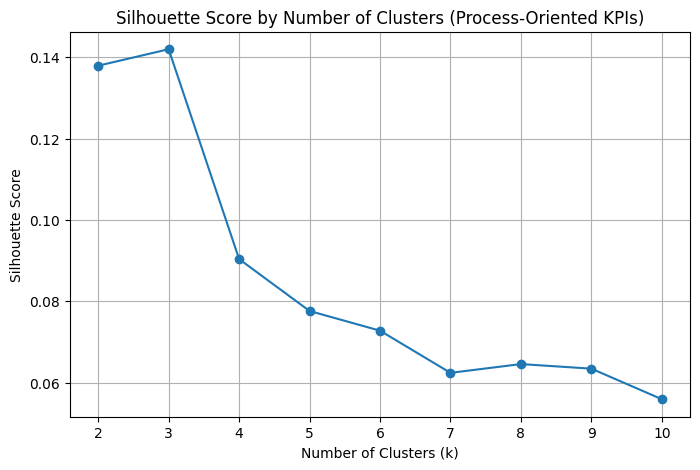

In [60]:
# =========================================
# PART 5 — Silhouette Analysis (to find best k)
# =========================================
silhouette_scores = []
K_range = range(2, 11)  # Try k=2 through k=10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title("Silhouette Score by Number of Clusters (Process-Oriented KPIs)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [61]:
# =========================================
# PART 6 — Final Clustering with Optimal k
# =========================================
from sklearn.cluster import KMeans
import pandas as pd

optimal_k = 3  # ← best silhouette score result
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit model and assign cluster labels
df_process['Cluster'] = final_kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original dataset (matching rows)
df_clustered = pd.concat([Crown_Legacy_Stats_FULL.reset_index(drop=True), df_process], axis=1)

# Preview cluster assignments
df_clustered.head()


,Date,Match,Competition,Duration,Team,Scheme,Goals,xG,Shots,Shots on Target,...,% Defensive duels won,Aerial duels,% Aerial duels won,Sliding tackles,% Successful sliding tackles,Interceptions,Clearances,Fouls,PPDA,Cluster
0,Crown Legacy FC,NaN,NaN,NaN,NaN,NaN,5.621,5.176,39.87,15.89,...,51.46,16.72,55.98,8.64,62.51,30.37,13.18,14.94,10.34,2.0
1,Opponents,NaN,NaN,NaN,NaN,NaN,4.702,4.792,35.25,13.61,...,51.30,16.95,56.74,8.91,61.83,31.19,13.34,15.21,10.34,2.0
2,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Crown Legacy FC,4-4-2 (100.0%),3.000,2.770,17.00,4.00,...,54.55,29.00,51.72,3.00,0.00,19.00,7.00,15.00,8.58,0.0
3,2025-09-05,Crown Legacy FC - Carolina Core 3:4,United States. MLS Next Pro,100.0,Carolina Core,5-4-1 (100.0%),4.000,1.370,11.00,9.00,...,70.59,29.00,41.38,4.00,50.00,41.00,12.00,12.00,17.67,1.0
4,2025-09-01,Orlando City B - Crown Legacy FC 1:0,United States. MLS Next Pro,102.0,Crown Legacy FC,4-4-2 (100.0%),0.000,3.620,23.00,5.00,...,60.24,25.00,64.00,3.00,66.67,35.00,16.00,22.00,8.14,0.0


In [62]:
# =========================================
# PART 7 — Visualize Cluster Centroids
# =========================================
# Create DataFrame of cluster centers using the correct feature names
cluster_centers = pd.DataFrame(
    final_kmeans.cluster_centers_,
    columns=df_process.columns[:-1]  # exclude 'Cluster'
)

# Inverse transform to bring values back to original scale
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(final_kmeans.cluster_centers_),
    columns=df_process.columns[:-1]
)

# Display centroids rounded to 2 decimals
print(cluster_centers.round(2))


   Shots  Shots on Target  % Shots on Target    xG  Possession, %  Passes  \
0  15.68             6.36              40.99  2.14          55.94  502.34   
1  11.03             4.25              38.27  1.40          46.75  387.03   
2  37.56            14.75              39.22  4.98          50.32  426.80   

   % Accurate Passes  Crosses  % Crosses accurate  Deep completed crosses  \
0              86.82    18.74               35.49                    6.62   
1              82.28    11.75               33.23                    3.70   
2              84.02    42.81               64.66                   26.65   

   ...  Defensive duels  % Defensive duels won  Aerial duels  \
0  ...            69.98                  59.72         22.13   
1  ...            75.02                  59.18         27.06   
2  ...            31.86                  51.38         16.84   

   % Aerial duels won  Sliding tackles  % Successful sliding tackles  \
0               45.65             3.28               

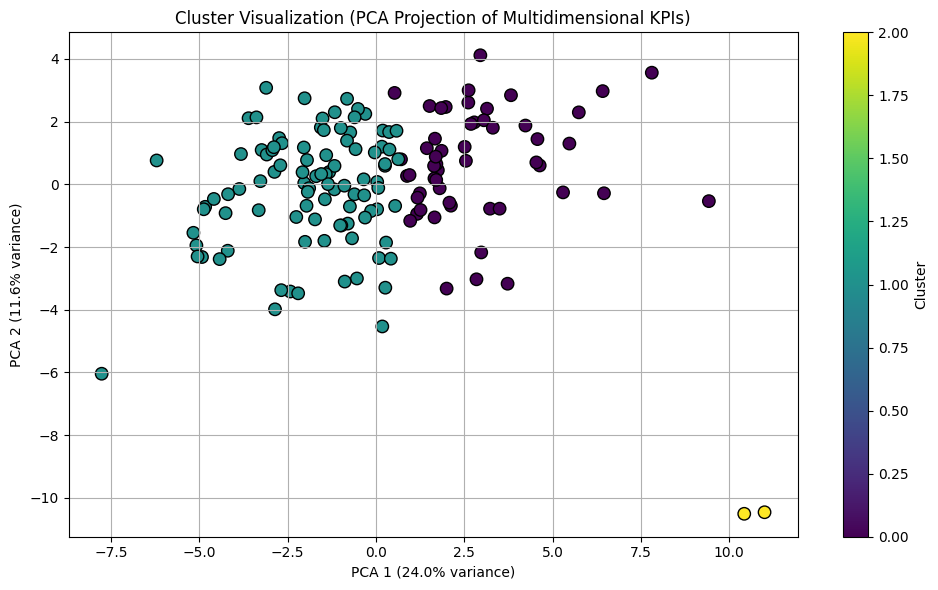

In [63]:
# =========================================
# PART 8 — Visualize Clusters in Multiple Dimensions (PCA 2D Projection)
# =========================================
from sklearn.decomposition import PCA

# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'Cluster': final_kmeans.labels_
})

# Plot PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df['PCA1'],
    pca_df['PCA2'],
    c=pca_df['Cluster'],
    cmap='viridis',
    s=80,
    edgecolor='k'
)

plt.title('Cluster Visualization (PCA Projection of Multidimensional KPIs)')
plt.xlabel(f'PCA 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
plt.ylabel(f'PCA 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


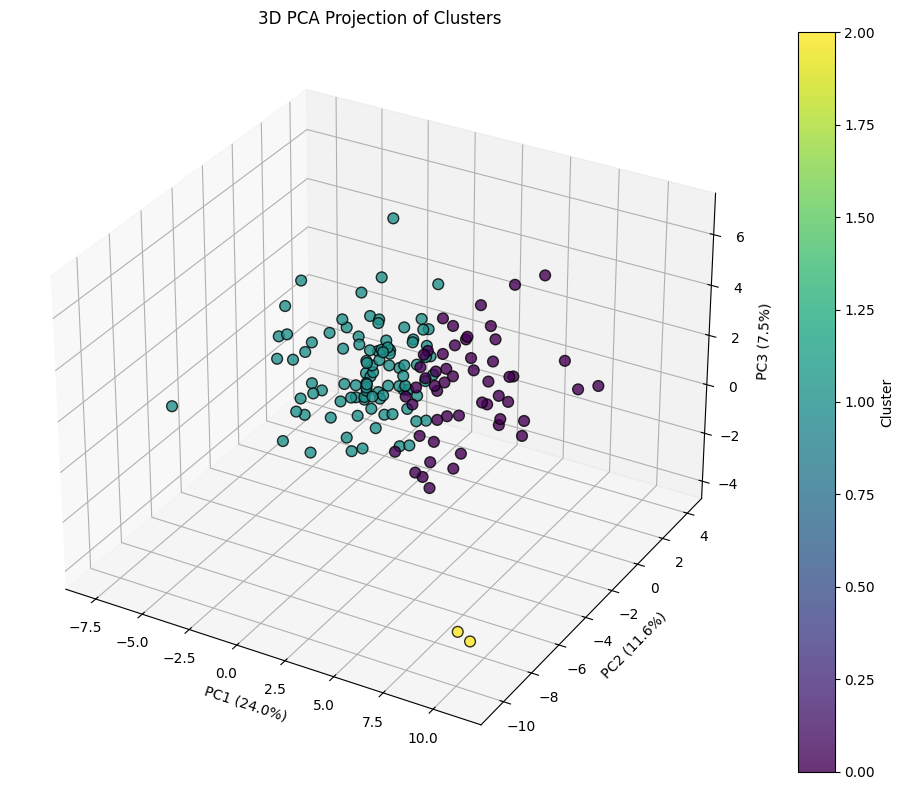

In [64]:
# =========================================
# PART 9 — Visualize Clusters in 3D (PCA Projection)
# =========================================
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting
import matplotlib.pyplot as plt

# Project data into 3 principal components
pca_3 = PCA(n_components=3, random_state=42)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Build a DataFrame (optional) for clarity
import pandas as pd
df_pca3 = pd.DataFrame({
    'PC1': X_pca_3[:, 0],
    'PC2': X_pca_3[:, 1],
    'PC3': X_pca_3[:, 2],
    'Cluster': final_kmeans.labels_
})

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_pca3['PC1'], df_pca3['PC2'], df_pca3['PC3'],
    c=df_pca3['Cluster'], cmap='viridis', s=60, edgecolor='k', alpha=0.8
)

ax.set_xlabel(f"PC1 ({pca_3.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca_3.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca_3.explained_variance_ratio_[2]*100:.1f}%)")
ax.set_title("3D PCA Projection of Clusters")

# Optional: add colorbar
fig.colorbar(sc, ax=ax, label='Cluster')

plt.tight_layout()
plt.show()


In [65]:
# | Step | Purpose                                                                  |
# | -----| ------------------------------------------------------------------------ |
# | 1    | Import all necessary tools                                               |
# | 2    | Load dataset and keep *only* process-oriented KPIs                       |
# | 3    | Standardize all features (important for KMeans)                          |
# | 4    | Run initial KMeans to test structure                                     |
# | 5    | Use silhouette analysis to find the best number of clusters              |
# | 6    | Run final clustering with optimal cluster count                          |
# | 7    | Examine cluster centers to interpret differences                         |
# | 8    | Visualize clusters in 2D space using PCA (to observe general separation) |
# | 9    | Visualize clusters in 3D space using PCA (for deeper pattern insight)    |


In [66]:
# | KPI                         | Why It’s Outcome-Based                                                                                                              |
# | --------------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
# | Goals                       | The final result of offensive actions — the ultimate *outcome* of a possession.                                                     |
# | Penalties converted         | Shows how many penalty kicks resulted in goals — a *scoring result*, not a process.                                                 |
# | % Penalties converted       | A *success rate* — tells you the efficiency of scoring from penalties, not how many were taken.                                     |
# | Conceded goals              | Reflects *defensive outcomes* (how many goals allowed) rather than the defensive actions that led to preventing or allowing them.   |
# | Yellow cards                | Result of a *referee decision* after a foul — not part of the on-field tactical process.                                            |
# | Red cards                   | Same as above — an *outcome* of a disciplinary event, not a playing behavior.                                                       |
# | Corners with shots          | Describes how often a corner *resulted in* a shot — focuses on the *result* of the set piece, not how often the set piece happened. |
# | % Corners with shots        | The *conversion rate* of corners to shots — efficiency of an outcome.                                                               |
# | Counterattacks with shots   | Measures how many counterattacks *ended with a shot* — again, an *end product*.                                                     |
# | % Counterattacks with shots | Efficiency of counterattacks that *resulted in* a shot — outcome of attacking process.                                              |
# | PA with shots               | (Positional Attacks with shots) — shows how many positional attacks *led to a shot*. That’s an *outcome measure* of those attacks.  |
# | % PA with shots             | Conversion rate of positional attacks to shots — efficiency of attack outcomes.                                                     |
# | Set pieces with shots       | How many set pieces *produced* a shot — that’s a *result*, not a process.                                                           |
# | % Set pieces with shots     | The success rate of turning set pieces into shots — another *outcome efficiency metric*.                                            |


In [74]:
from sklearn.decomposition import PCA

# Fit PCA with 6 components
pca_6 = PCA(n_components=6, random_state=42)
X_pca_6 = pca_6.fit_transform(X_scaled)

# Explained variance
explained_var = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(6)],
    'Explained Variance (%)': pca_6.explained_variance_ratio_ * 100
})

print(explained_var)
print(f"\nTotal Variance Explained (PC1–PC6): {pca_6.explained_variance_ratio_[:6].sum() * 100:.2f}%")


  Principal Component  Explained Variance (%)
0                 PC1               24.002225
1                 PC2               11.597764
2                 PC3                7.469056
3                 PC4                5.436230
4                 PC5                4.712742
5                 PC6                4.039722

Total Variance Explained (PC1–PC6): 57.26%


In [79]:
print("PCA features:", pca_6.components_.T.shape[0])
print("df_process columns:", len(df_process.columns))



PCA features: 40
df_process columns: 41


In [80]:
print("df_process columns list:")
print(df_process.columns.tolist())


df_process columns list:
['Shots', 'Shots on Target', '% Shots on Target', 'xG', 'Possession, %', 'Passes', '% Accurate Passes', 'Crosses', '% Crosses accurate', 'Deep completed crosses', 'Deep completed passes', 'Runs', 'Runs leading to crosses', 'Touches in penalty area', 'Offensive duels', '% Offensive duels won', 'Forward passes', '% Accurate forward passes', 'Back passes', '% Accurate back passes', 'Lateral passes', '% Accurate lateral passes', 'Long passes', '% Accurate long passes', 'Passes to final third', '% Accurate passes to final third', 'Progressive passes', '% Accurate progressive passes', 'Smart passes', '% Accurate smart passes', 'Defensive duels', '% Defensive duels won', 'Aerial duels', '% Aerial duels won', 'Sliding tackles', '% Successful sliding tackles', 'Interceptions', 'Clearances', 'Fouls', 'PPDA', 'Cluster']


In [81]:
df_process = df_process.select_dtypes(include='number')


In [82]:
X_scaled = scaler.fit_transform(df_process)

from sklearn.decomposition import PCA
pca_6 = PCA(n_components=6)
pca_6.fit(X_scaled)


,n_components,6
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [83]:
loadings_6 = pd.DataFrame(
    pca_6.components_.T,
    columns=[f'PC{i+1}' for i in range(6)],
    index=df_process.columns
)
loadings_6.round(3)


,PC1,PC2,PC3,PC4,PC5,PC6
Shots,0.202,0.268,-0.070,-0.108,-0.013,0.073
Shots on Target,0.155,0.236,-0.154,-0.172,-0.029,0.277
% Shots on Target,0.007,0.058,-0.134,-0.142,-0.056,0.317
xG,0.149,0.236,-0.142,-0.151,-0.024,0.147
"Possession, %",0.227,-0.166,0.207,0.067,0.050,0.075
Passes,0.238,-0.223,0.120,0.122,-0.025,0.140
% Accurate Passes,0.192,-0.264,-0.226,0.103,0.125,0.014
Crosses,0.230,0.164,0.061,-0.000,-0.056,-0.238
% Crosses accurate,0.062,0.050,-0.219,0.175,-0.256,-0.164
Deep completed crosses,0.207,0.208,-0.068,0.148,-0.189,-0.216


In [86]:
print(loadings.columns)


Index(['PC1', 'PC2'], dtype='object')


In [92]:
print(X_scaled.shape)
print(df.columns.shape)
print(df_process.columns.shape)


(151, 41)
(110,)
(41,)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Fit PCA (assuming you already scaled your data)
pca_6 = PCA(n_components=6)
pca_6.fit(X_scaled)

# Create the loadings DataFrame
loadings_6 = pd.DataFrame(
    pca_6.components_.T,
    columns=[f'PC{i+1}' for i in range(6)],
    index=df_process.columns  
)

loadings_6.round(3)


,PC1,PC2,PC3,PC4,PC5,PC6
Shots,0.202,0.268,-0.070,-0.108,-0.013,0.073
Shots on Target,0.155,0.236,-0.154,-0.172,-0.029,0.277
% Shots on Target,0.007,0.058,-0.134,-0.142,-0.056,0.317
xG,0.149,0.236,-0.142,-0.151,-0.024,0.147
"Possession, %",0.227,-0.166,0.207,0.067,0.050,0.075
Passes,0.238,-0.223,0.120,0.122,-0.025,0.140
% Accurate Passes,0.192,-0.264,-0.226,0.103,0.125,0.014
Crosses,0.230,0.164,0.061,-0.000,-0.056,-0.238
% Crosses accurate,0.062,0.050,-0.219,0.175,-0.256,-0.164
Deep completed crosses,0.207,0.208,-0.068,0.148,-0.189,-0.216


C:\Users\jelli\AppData\Local\Temp\ipykernel_7792\1040735441.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette='viridis')
C:\Users\jelli\AppData\Local\Temp\ipykernel_7792\1040735441.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette='viridis')
C:\Users\jelli\AppData\Local\Temp\ipykernel_7792\1040735441.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette='viridis'

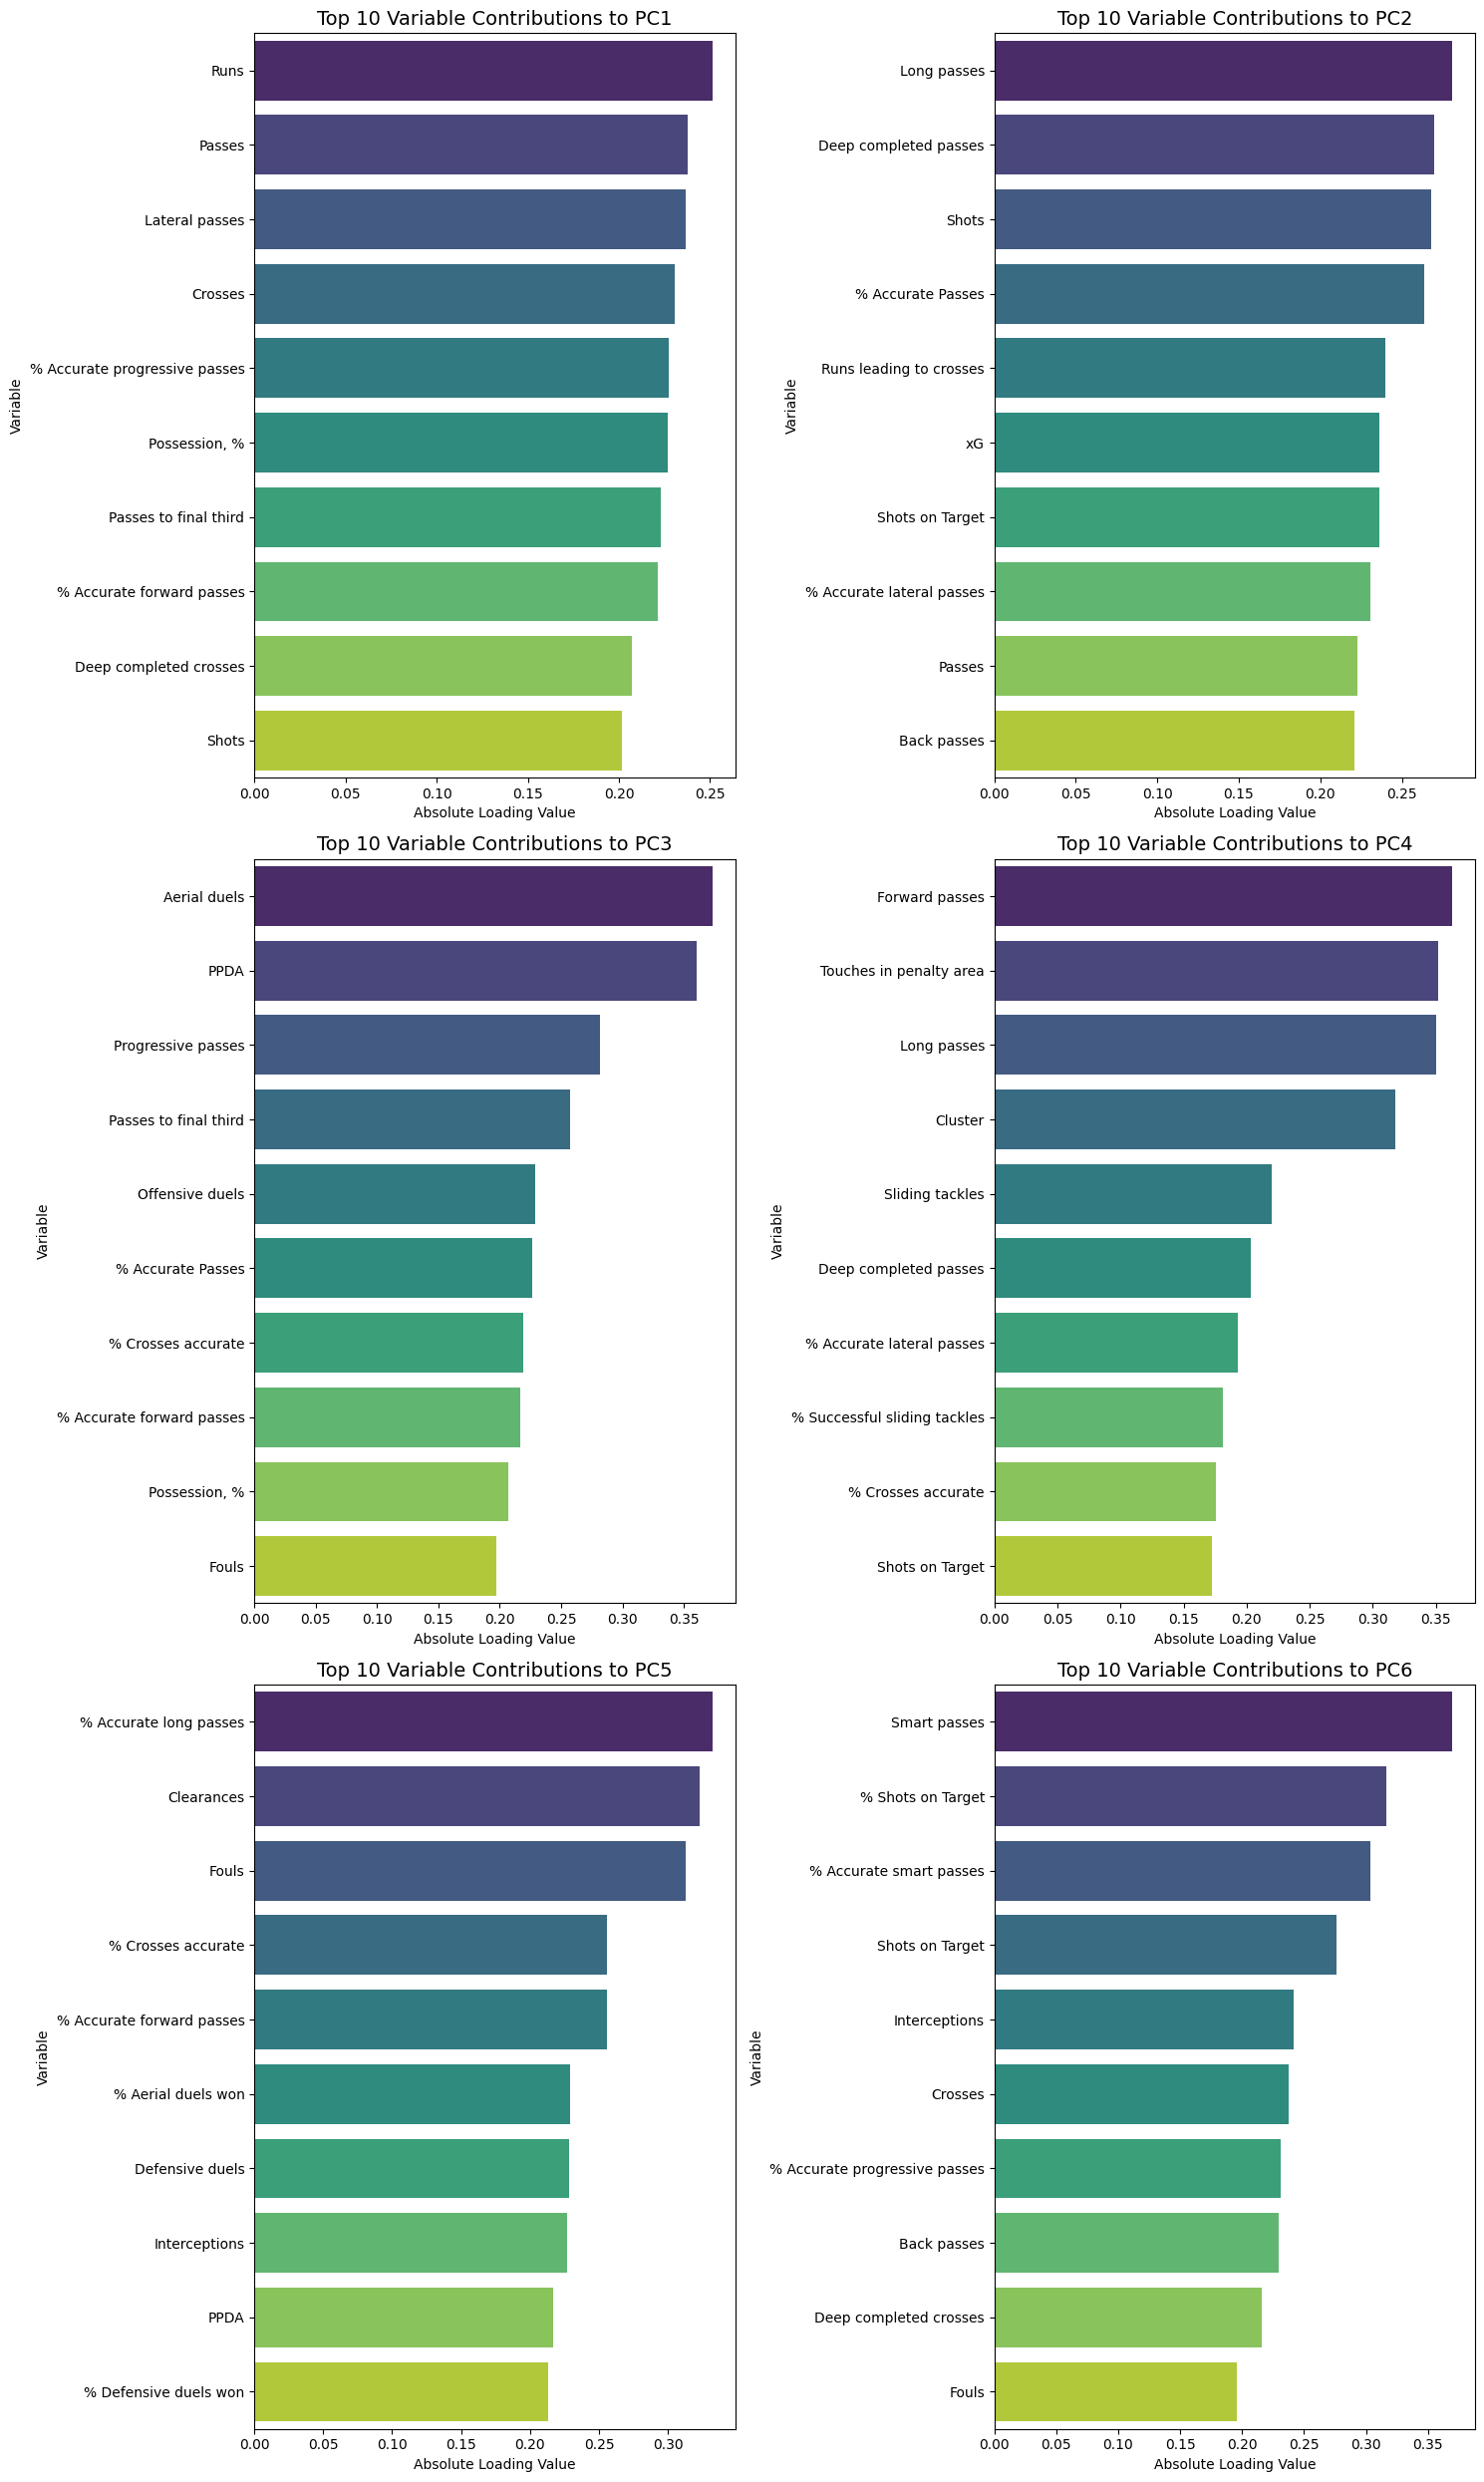

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize top 10 contributors for each component
num_pcs = 6
plt.figure(figsize=(15, 25))

for i in range(num_pcs):
    pc = f'PC{i+1}'
    sorted_loadings = loadings_6[pc].abs().sort_values(ascending=False).head(10)
    plt.subplot(3, 2, i+1)
    sns.barplot(x=sorted_loadings.values, y=sorted_loadings.index, palette='viridis')
    plt.title(f'Top 10 Variable Contributions to {pc}', fontsize=14)
    plt.xlabel('Absolute Loading Value')
    plt.ylabel('Variable')

plt.tight_layout()
plt.show()


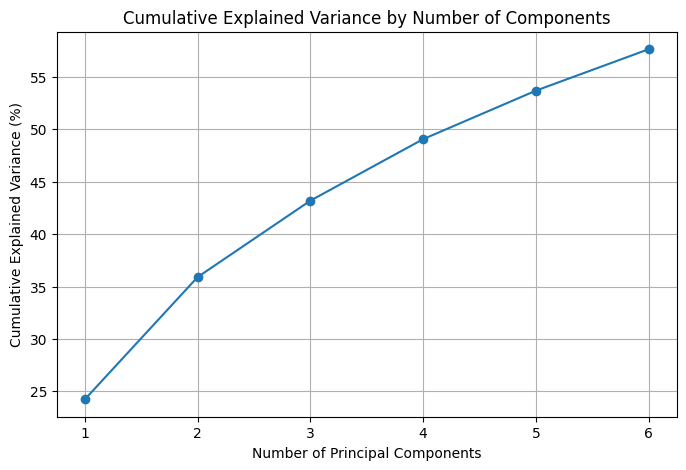

In [84]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca_6.explained_variance_ratio_) + 1),
         np.cumsum(pca_6.explained_variance_ratio_) * 100,
         marker='o')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()


Interpretation of PCA Cumulative Explained Variance Plot

1. Purpose of the Plot

This plot is a standard output from Principal Component Analysis (PCA). Its primary function is to serve as a diagnostic tool for dimensionality reduction. It helps select the optimal number of principal components (PCs) that can represent the original dataset while retaining an acceptable amount of the total variance (information).

The x-axis represents the Number of Principal Components used. The y-axis represents the Cumulative Explained Variance (%), which is the total percentage of variability captured by the selected number of components.


2. Key Data Points and Implications

The plotted points reveal how much information is lost or retained as the dimensionality is reduced:

What the data shows:

1 Component: Explains about 24.5% of the total variance.

2 Components: Explains about 36% of the total variance.

3 Components: Explains about 43% of the total variance.

4 Components: Explains about 49% of the total variance.

5 Components: Explains about 54% of the total variance.

6 Components: Explains nearly 57% of the total variance.


3. Determining the Optimal Number (The "Elbow" Method)

The elbow method indicates to look for the point where the curve starts to bend and flatten out. This point represents where the marginal gain (the amount of new variance explained by adding one more component) begins to diminish significantly.

The steepest gains occur between PC 1, 2, and 3.

The curve starts to significantly flatten out (the "elbow" region) between 4 and 6 components.


4. Conclusion and Strategic Decision

Low Effectiveness: The fact that 6 components only explain approximately 57% of the total variance is significant. Ideally the aim is to capture 80% to 90% of the variance. This plot suggests that:
The original data's total variance is quite evenly distributed across many features, or a massive dimensionality reduction (e.g., down to 2 or 3 PCs) could lead to a substantial loss of information (approximately 60%-75%). 

In [1]:
def get_result(row):
    if row['Goals For'] > row['Goals Against']:
        return 'Win'
    elif row['Goals For'] < row['Goals Against']:
        return 'Loss'
    else:
        return 'Draw'

df['Result'] = df.apply(get_result, axis=1)


NameError: name 'df' is not defined